# Universidad de Buenos Aires
# Algoritmos evolutivos - TP1
# Octubre 2024

### <font color='violet'>Alumno: Zenklusen, Kevin</font>

## Ejercicio 1:

Mediante un algoritmo genético desarrollado en Python encontrar el valor 
máximo de la función y = x²<br>
 
a. (Valor 0.6 puntos) Indicar en el informe (en .pdf) el resultado de la 
solución encontrada (valor de “x”) si se ejecuta el algoritmo 10 
lanzamientos. <br><br>
Los parámetros del algoritmo son:<br>
- Selección por Ruleta
- Intervalo de la variable de decisión: [0, 31]∈Z
- Aplicar elitismo: Si
- Gen de cruza monopunto aleatorio
- Probabilidad de cruce 0.92
- Probabilidad de mutación 0.1
- Tamaño de la población: 4
- Generaciones: 10

In [73]:
#  -----------------------------------------------------------------
# Algoritmo Genetico que encuentra el maximo de la funcion x^2
# en el intervalo [0, 31]
# Seleccion por ruleta
# Pc = 0.92
# Pm = 0.1
#  -----------------------------------------------------------------


import random

# Parametros
TAMANIO_POBLACION = 4
LONGITUD_CROMOSOMA = 5
TASA_MUTACION = 0.1
TASA_CRUCE = 0.92
GENERACIONES = 10


#  -----------------------------------------------------------------
# Aptitud (y = x^2)
#  -----------------------------------------------------------------
def aptitud(cromosoma):
    x = int(cromosoma, 2)
    return x ** 2


#  -----------------------------------------------------------------
# Inicializar la población
#  -----------------------------------------------------------------
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for tp in range(tamanio_poblacion):
        cromosoma = ""
        for lc in range(longitud_cromosoma):
            #  se crean los cromosomas alelo por alelo en forma aleatoria
            #  hasta completar toda la poblacion
            cromosoma = cromosoma + str(random.randint(0, 1))
        poblacion.append(cromosoma)
    return poblacion


#  -----------------------------------------------------------------
# Seleccion por ruleta
#  -----------------------------------------------------------------
def seleccion_ruleta(poblacion, aptitud_total):
    probabilidades = []
    for individuo in poblacion:
        prob = aptitud(individuo) / aptitud_total
        probabilidades.append(prob)

    probabilidades_acumuladas = []
    suma = 0
    for prob in probabilidades:
        suma = suma + prob
        probabilidades_acumuladas.append(suma)

    r = random.random()
    # despues de generar un numero aleatorio entre 0 y 1
    # se itera sobre la lista probabilidades_acumuladas
    # y se obtiene el indice (i) del cromosoma que selecciono para que forme parte de la nueva poblacion
    # tambien se obtiene el valor de probabilidad acumulada en la variable "acumulada"
    for i, acumulada in enumerate(probabilidades_acumuladas):
        if r <= acumulada:
            return poblacion[i]


#  -----------------------------------------------------------------
# Cruce monopunto con probabilidad de cruza pc = 0.92
#  -----------------------------------------------------------------
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)  # elijo aleatoriamente un punto de cruce
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
    else:
        descendiente1, descendiente2 = progenitor1, progenitor2
    return descendiente1, descendiente2


#  -----------------------------------------------------------------
# mutacion
#  -----------------------------------------------------------------
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ""
    for bit in cromosoma:  # aqui se itera cada gen del cromosoma recibido
        if random.random() < tasa_mutacion:
            # se produce la mutacion de un alelo si es que el numero aleatorio generado
            # es inferior que tasa_mutacion tambien llamado "pm" (prob.de mutacion)
            cromosoma_mutado = cromosoma_mutado + str(int(not int(bit)))
        else:
            cromosoma_mutado = cromosoma_mutado + bit
    return cromosoma_mutado


#  -----------------------------------------------------------------
# aplicacion de operadores geneticos
#  -----------------------------------------------------------------
def algoritmo_genetico(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)

    for generacion in range(generaciones):  # en este caso se definio un maximo de 10 generaciones
        print("Generación:", generacion + 1)

        # se calcula aptitud total (suma de evaluaciones de cada cromosoma) para luego
        # poder obtener la Ps de cada individuo (Ps = f(i) / sumatoria(f(i)) <-ruleta)
        aptitud_total = 0
        for cromosoma in poblacion:
            aptitud_total = aptitud_total + aptitud(cromosoma)

        print("Sumatoria de aptitudes total:", aptitud_total)

        #  -----------------------------------------------------------------
        # seleccion de progenitores con el metodo ruleta
        # se crea una lista vacia de progenitores primero y luego se llama
        # a la funcion seleccion_ruleta para que devuelva de a uno los individuos
        # que se convertiran en futuros progenitores
        progenitores = []
        for _ in range(tamanio_poblacion):
            progenitores.append(seleccion_ruleta(poblacion, aptitud_total))

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, tamanio_poblacion, 2):
            #  se llama a cruce_mono_punto y se le envia pares de progenitores secuencialmente
            # para que se produzca la cruza (en este caso monopunto) segun la tasa_cruce (o Pc)
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # Aqui se aplica elitismo
        # se reemplazar los peores cromosomas con los mejores progenitores
        poblacion.sort(key=aptitud)
        descendientes_mutados.sort(key=aptitud, reverse=True)
        for i in range(len(descendientes_mutados)):
            if aptitud(descendientes_mutados[i]) > aptitud(poblacion[i]):
                poblacion[i] = descendientes_mutados[i]

        # mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)
        print("Mejor individuo:", int(mejor_individuo, 2), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

    return max(poblacion, key=aptitud)


#  -----------------------------------------------------------------
# algoritmo genetico ejecucion principal
#  -----------------------------------------------------------------
print("_________________________________________________________________________________")
print()
mejor_solucion = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
print("Mejor solución:", int(mejor_solucion, 2), "Aptitud:", aptitud(mejor_solucion))


resultados = []
for _ in range(10):
    mejor_solucion = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
    resultado = int(mejor_solucion, 2)
    aptitud_mejor = aptitud(mejor_solucion)
    resultados.append((resultado, aptitud_mejor))
    print("Mejor solución:", resultado, "Aptitud:", aptitud_mejor)


print("Mejores resultados")
print(resultados)

_________________________________________________________________________________

Generación: 1
Sumatoria de aptitudes total: 1135
Mejor individuo: 27 Aptitud: 729
_________________________________________________________________________________
Generación: 2
Sumatoria de aptitudes total: 2359
Mejor individuo: 27 Aptitud: 729
_________________________________________________________________________________
Generación: 3
Sumatoria de aptitudes total: 2863
Mejor individuo: 27 Aptitud: 729
_________________________________________________________________________________
Generación: 4
Sumatoria de aptitudes total: 2916
Mejor individuo: 27 Aptitud: 729
_________________________________________________________________________________
Generación: 5
Sumatoria de aptitudes total: 2916
Mejor individuo: 27 Aptitud: 729
_________________________________________________________________________________
Generación: 6
Sumatoria de aptitudes total: 2916
Mejor individuo: 27 Aptitud: 729
_______________

In [74]:
import pandas as pd

str_resultados = []
for resultado in resultados:
    str_resultados.append(resultado[0])
df1 = pd.DataFrame(str_resultados)
df1.index = range(1, len(df1) + 1)
df1.index.name = 'Lanzamiento'
df1.columns = ['Solución encontrada']
df1.head(10)

Solución encontrada
Lanzamiento                     
1                             31
2                             31
3                             31
4                             31
5                             31
6                             31
7                             31
8                             31
9                             31
10                            31

## Ejercicio 2:

Resolver las siguientes consignas:
Minimizar mediante tres algoritmos genéticos desarrollados en Python la 
función y = x²<br>

a. Indicar en el informe (en .pdf) el resultado de la 
solución encontrada (valor de “x”) si se ejecutan los 3 algoritmos un total 
de 30 lanzamientos cada uno.  <br><br>
Los parámetros de los algoritmos son:<br>
- Selección por Ranking, Ruleta y Torneo
- Intervalo de la variable de decisión: [-31, 31]∈R (con un dígito decimal)
- Aplicar elitismo: Si (solo en el método Ruleta y Ranking)
- Gen de cruza monopunto aleatorio
- Probabilidad de cruce 0.85
- Probabilidad de mutación 0.09
- Tamaño de la población: 4
- Generaciones: 10

In [2]:
import random
import numpy as np
import matplotlib as plt

In [5]:
plot : bool = True

### Ruleta:

_________________________________________________________________________________



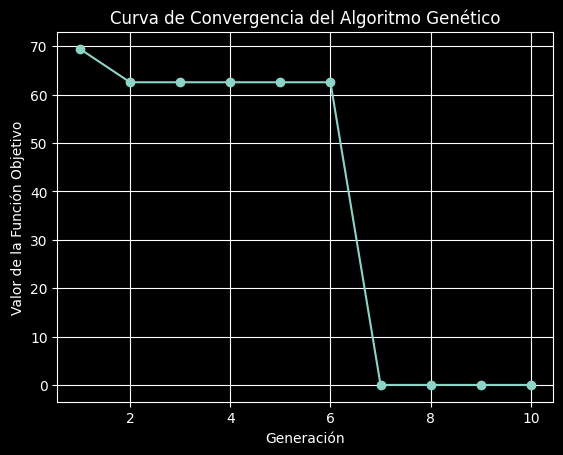

Mejor solución: 0.030303030303031164 Aptitud: 521.3020584011347
_________________________________________________________________________________



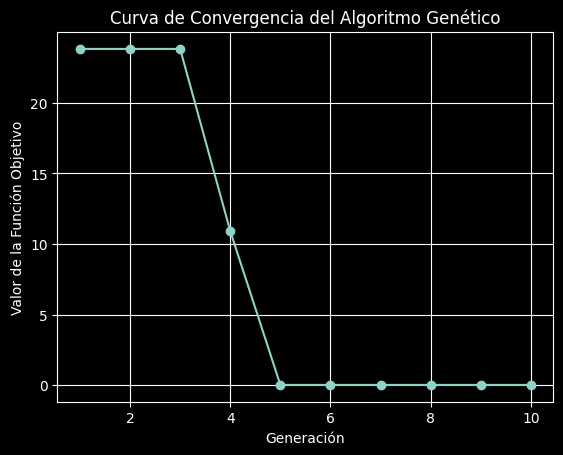

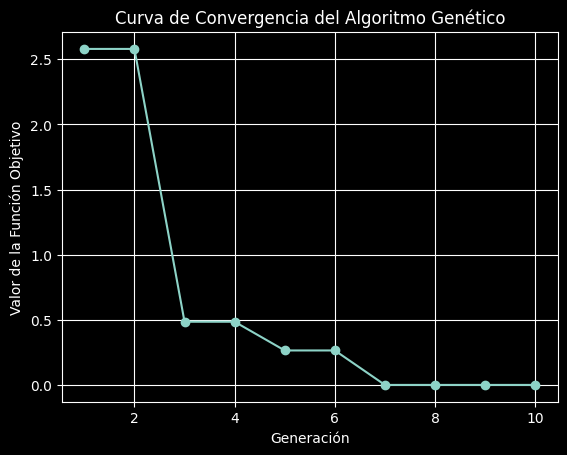

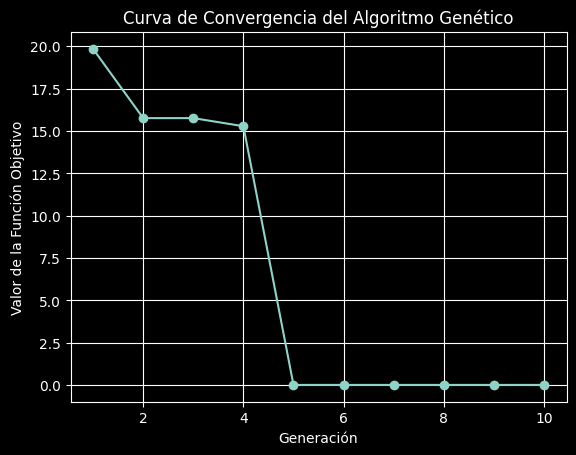

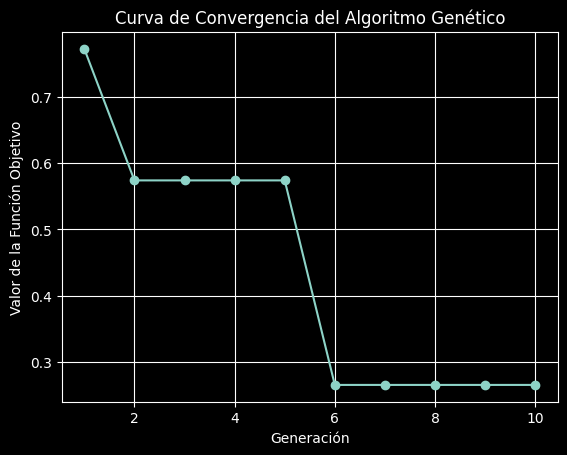

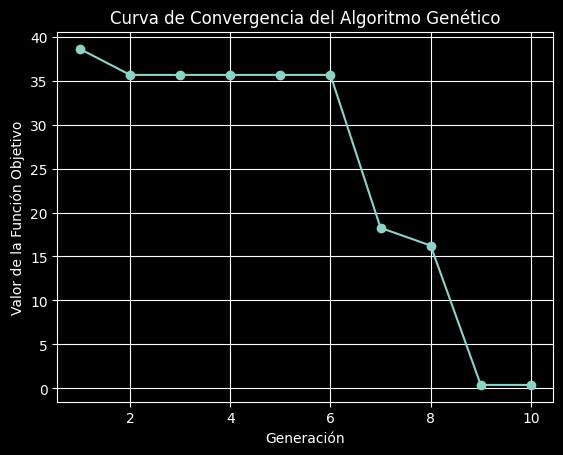

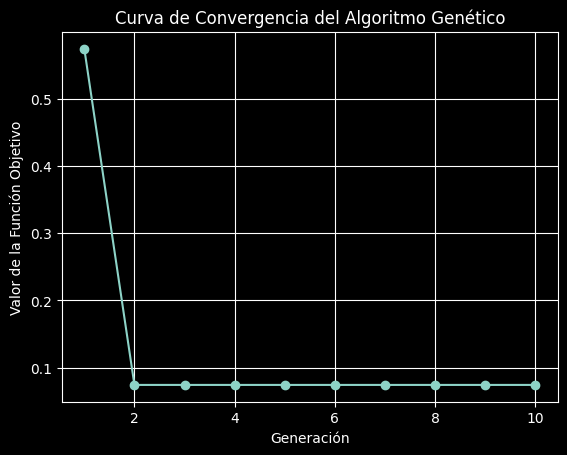

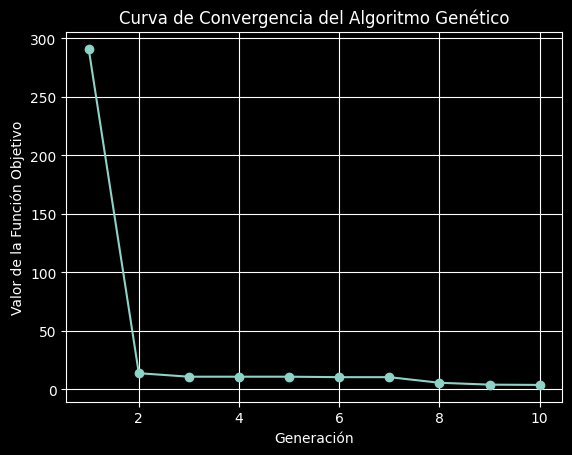

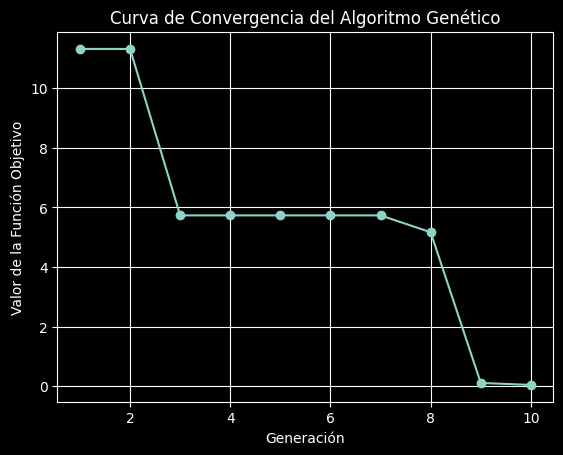

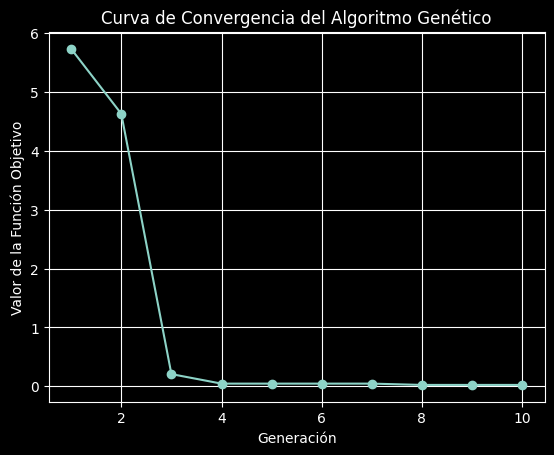

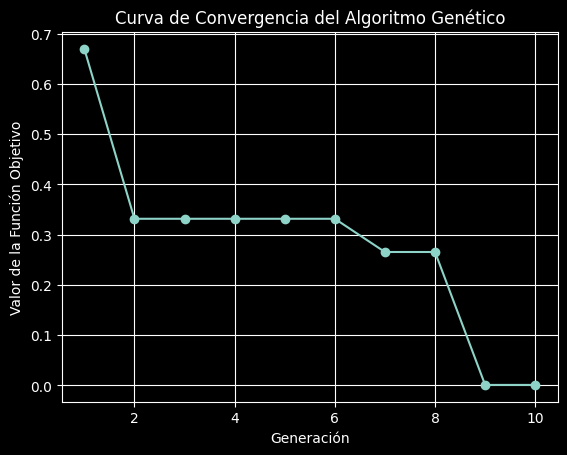

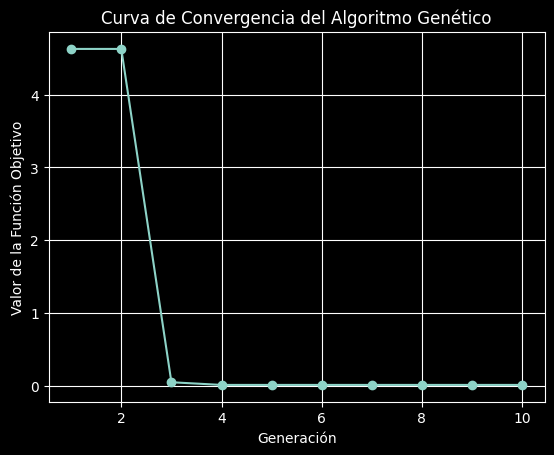

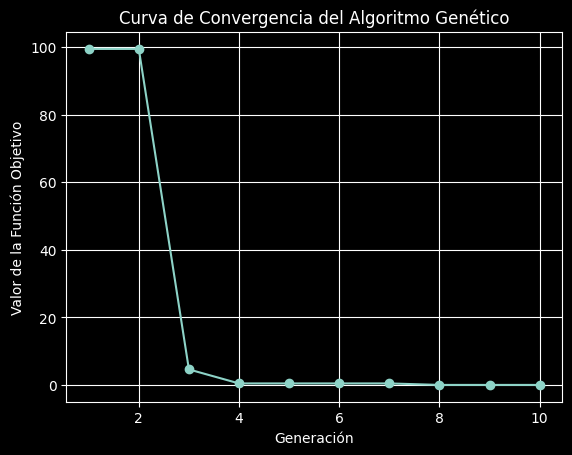

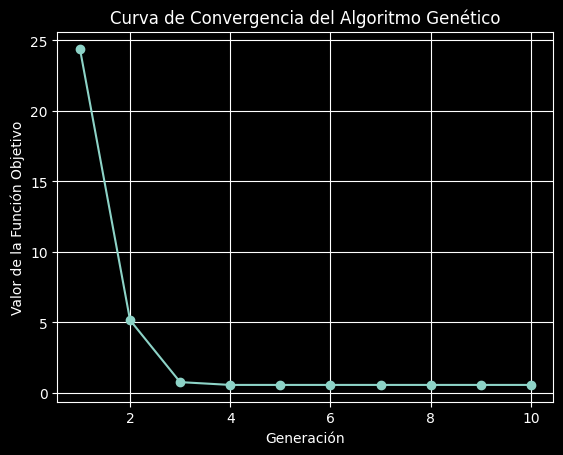

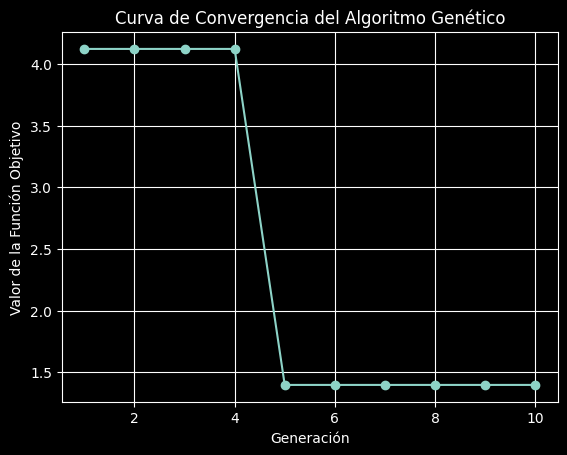

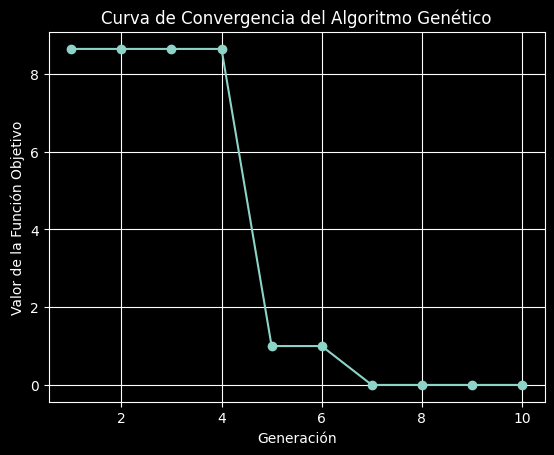

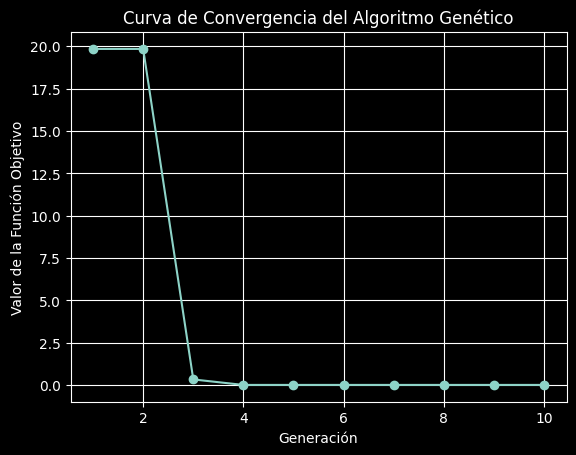

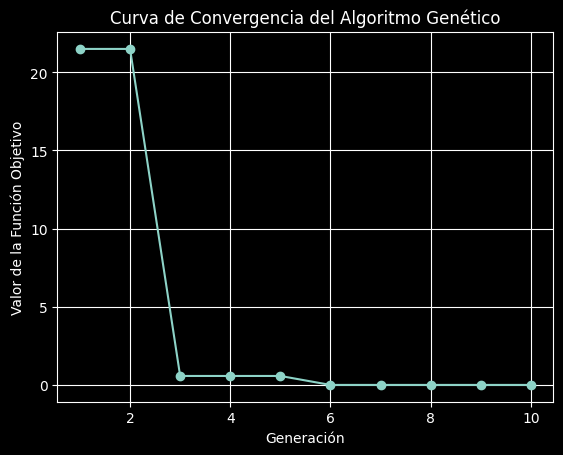

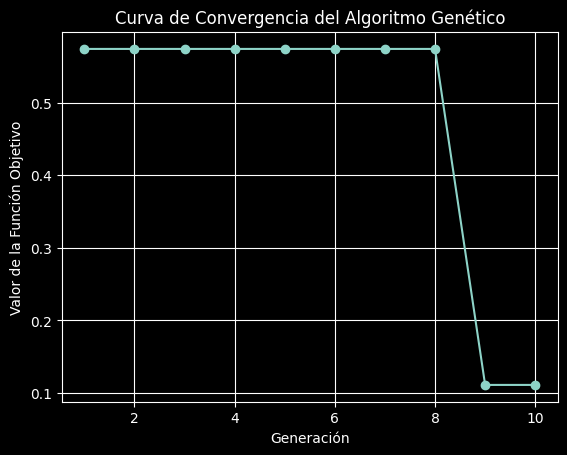

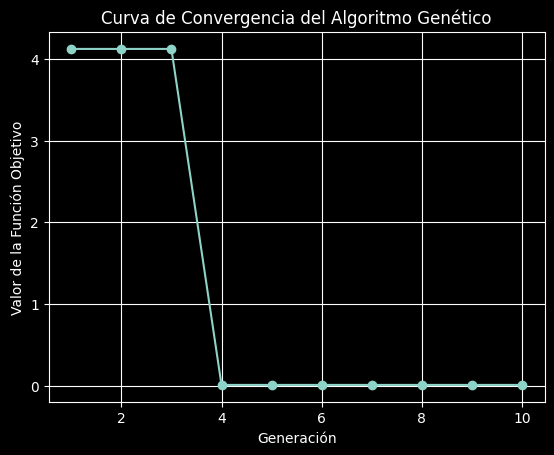

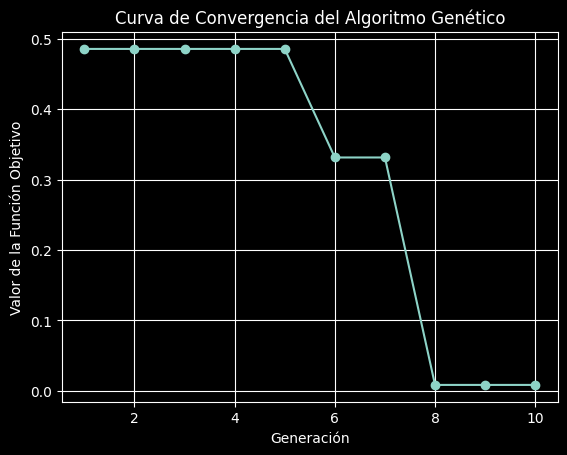

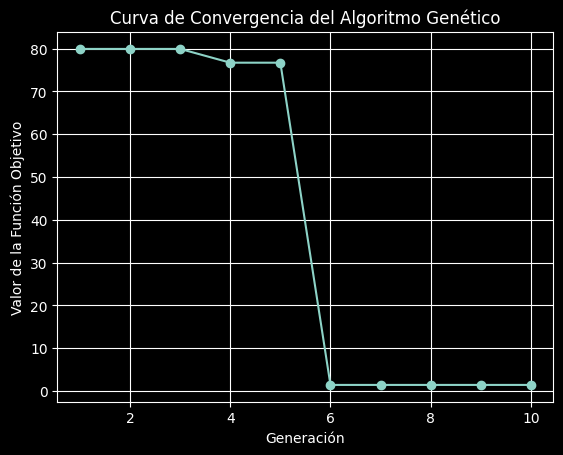

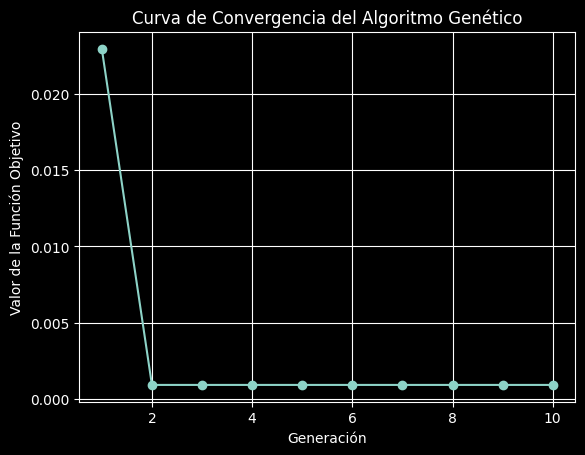

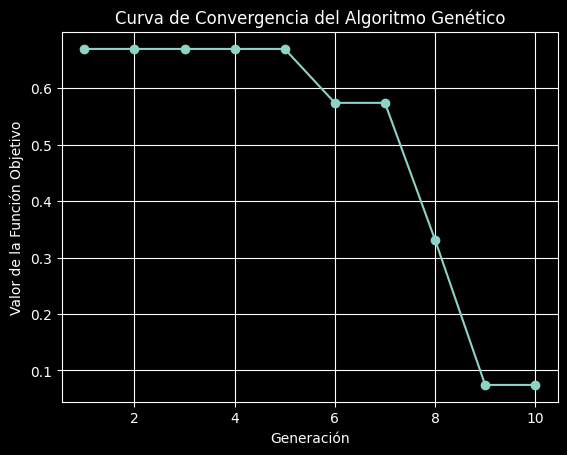

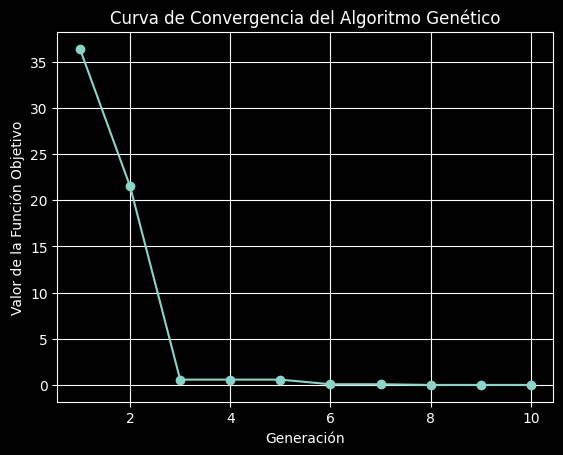

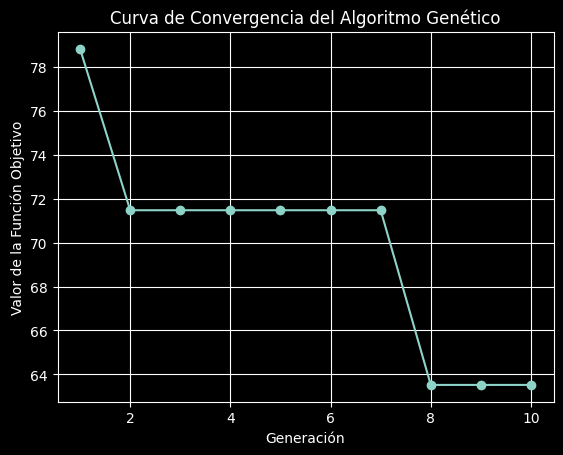

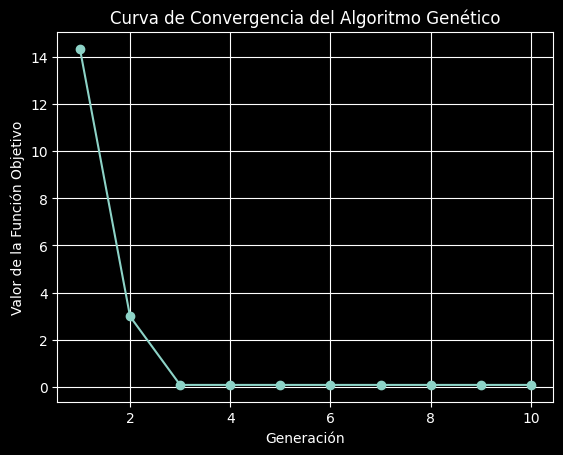

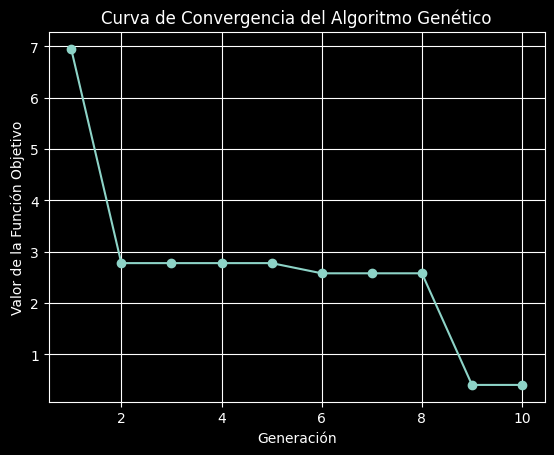

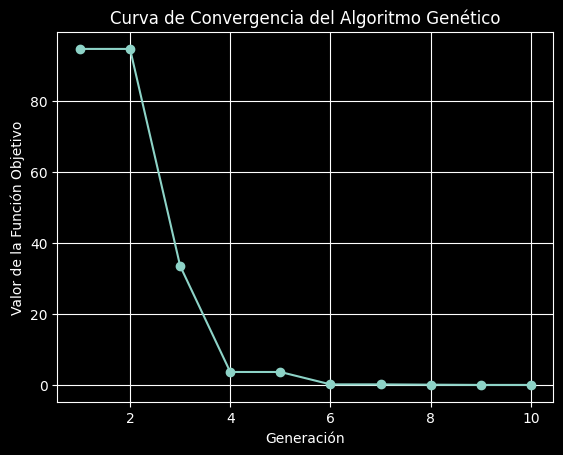

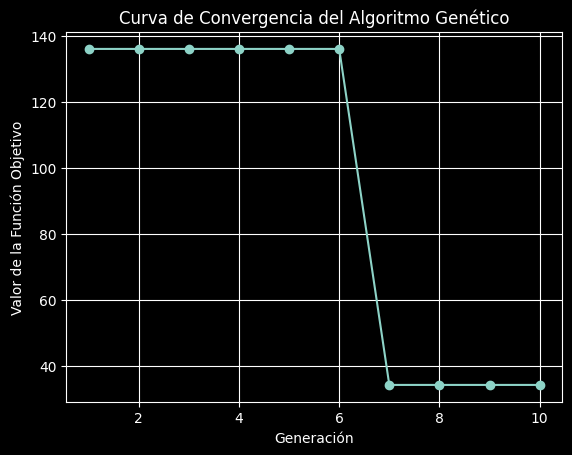

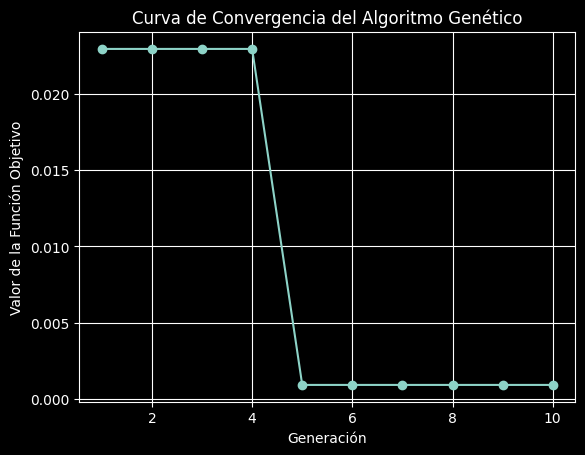


--- Resultados de 30 ejecuciones ---
Mínimo: -1.9696969696969688
Promedio: 0.5676767676767677
Máximo: 7.969696969696969
Desviación Estándar: 1.7971669936715775


In [17]:
# -*- coding: utf-8 -*-
"""ae_ag_x2_min_ruleta.ipynb

Automatically generated by Colab.

"""

#  -----------------------------------------------------------------
'''
Metaheurística: Algoritmo genético
Método: Ruleta
Función objetivo: x^2
Problema: Minimización
Intervalo de variable de desición: [-31, 31]
Elitismo: Si
Pc = 0.92 (probabilidad de cruza)
Pm = 0.1 (probabilidad de mutacion)
Iteraciones o generaciones = 20
#  -----------------------------------------------------------------
Algoritmo Genético que encuentra el mínimo de la función objetivo x^2 en el
intervalo [-31, 31]
El rango dado por [-31, 31] es 62 es decir: X_MIN - XMAX por tanto el rango
debe ser contenido por un exponente de 2 tal que 2^exponente >= 62, en este
caso exponente = 6, es decir 2^6=64, ( log2(62)=5.95 ) de este modo obtengo la
longitud del cromosoma, luego solo resta mapear lso cromosomas binarios en el
rango [-31, 31]
Para mapear se usa la fórmula:
x=X_MIN+decimal(valor_binario)*(X_MAX - X_MIN)/((2 ** LONGITUD_CROMOSOMA) - 1)
#  -----------------------------------------------------------------
Si necesito trabajar con números reales para obtener mas precisión se procede
igual pero se debe multiplicar el rango por 10 si quiero tener un dígito
decimal, x100 para 2 dígitos decimales, etc. En este caso, el rango es 62,
 multiplicado por 10 (para que proporcione 1 dígito decimal) es 620.
Para saber la dimensión del cromosoma debo despejar el exponente de
2^exponente = 620 , log2(620)=9.28
es decir que el valor que contiene a 620 es exponente=10; 2^10=1024
debo por tanto cambiar la constante LONGITUD_CROMOSOMA = 10, de ese modo ahora
el intervalo será real con 1 dígito [-31.0, 31.0]'''
#  -----------------------------------------------------------------

import random
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style("darkgrid")
plt.style.use('dark_background')


# parametros
TAMANIO_POBLACION = 4
LONGITUD_CROMOSOMA = 10
TASA_MUTACION = 0.09
TASA_CRUCE = 0.85
GENERACIONES = 10
X_MIN = -31
X_MAX = 31
EPSILON = 0.001  # Valor pequeño para evitar división por cero en la funcion fitness


#  -----------------------------------------------------------------
# funcion para mapear el valor binario a un rango [-31, 31]
#  -----------------------------------------------------------------
def binario_a_decimal(cromosoma):
    decimal = int(cromosoma, 2)
    x = X_MIN + decimal * (X_MAX - X_MIN) / ((2 ** LONGITUD_CROMOSOMA) - 1)
    return x

#  -----------------------------------------------------------------
# Aqui en las proximas lineas se puede ver que mi funcion objetivo es
# a veces diferente de mi funcion fitness, depende del problema a resolver
#  -----------------------------------------------------------------


#  -----------------------------------------------------------------
# funcion objetivo x^2
#  -----------------------------------------------------------------
def funcion_objetivo(x):
    return x ** 2


#  -----------------------------------------------------------------
# funcion fitness o tambien llamada funcion de aptitud (1/(x^2 + epsilon))
#  -----------------------------------------------------------------
def aptitud(cromosoma):
    x = binario_a_decimal(cromosoma)
    return 1 / (funcion_objetivo(x) + EPSILON)


#  -----------------------------------------------------------------
# se inicializa la poblacion
#  -----------------------------------------------------------------
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for tp in range(tamanio_poblacion):
        cromosoma = ''
        for lc in range(longitud_cromosoma):
            cromosoma = cromosoma+str(random.randint(0, 1))
        poblacion.append(cromosoma)
    return poblacion

#  -----------------------------------------------------------------
# seleccion por ruleta
#  -----------------------------------------------------------------
def seleccion_ruleta(poblacion, aptitud_total):
    probabilidades = []
    for individuo in poblacion:
        prob = aptitud(individuo) / aptitud_total
        probabilidades.append(prob)

    probabilidades_acumuladas = []
    suma = 0
    for prob in probabilidades:
        suma += prob
        probabilidades_acumuladas.append(suma)

    r = random.random()
    for i, acumulada in enumerate(probabilidades_acumuladas):
        if r <= acumulada:
            return poblacion[i]


#  -----------------------------------------------------------------
# cruce monopunto con probabilidad de cruza pc = 0.92
#  -----------------------------------------------------------------
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
    else:
        descendiente1, descendiente2 = progenitor1, progenitor2
    return descendiente1, descendiente2


#  -----------------------------------------------------------------
# mutacion
#  -----------------------------------------------------------------
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ""
    for bit in cromosoma:
        if random.random() < tasa_mutacion:
            cromosoma_mutado = cromosoma_mutado + str(int(not int(bit)))
        else:
            cromosoma_mutado = cromosoma_mutado + bit
    return cromosoma_mutado


#  -----------------------------------------------------------------
# aplicación de operadores geneticos
#  -----------------------------------------------------------------
def algoritmo_genetico_rul(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)
    mejor_funcion_objetivo_generaciones = []  # Lista para almacenar la aptitud del mejor individuo y grficar luego

    for generacion in range(generaciones):
        #print("Generación:", generacion + 1)

        # se calcula aptitud total para luego
        aptitud_total = sum(aptitud(cromosoma) for cromosoma in poblacion)

        #print("Aptitud total:", aptitud_total)

        #  -----------------------------------------------------------------
        # seleccion de progenitores con el metodo ruleta
        progenitores = []
        for _ in range(tamanio_poblacion):
            progenitores.append(seleccion_ruleta(poblacion, aptitud_total))

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, tamanio_poblacion, 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # Mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # Aquí se aplica elitismo
        # Se reemplazan los peores cromosomas con los mejores progenitores
        poblacion.sort(key=aptitud)  # se ordena la poblacion por aptitud en forma ascendente
        # se ordena los descendientes por aptitud en forma descendente
        descendientes_mutados.sort(key=aptitud, reverse=True)
        for i in range(len(descendientes_mutados)):
            if aptitud(descendientes_mutados[i]) > aptitud(poblacion[i]):
                poblacion[i] = descendientes_mutados[i]

        # Mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)  # Buscar el maximo para la aptitud
        mejor_funcion_objetivo_generaciones.append(funcion_objetivo(binario_a_decimal(mejor_individuo)))

        #print("mi", mejor_individuo)
        #print("Mejor individuo:", binario_a_decimal(mejor_individuo), "Aptitud:", aptitud(mejor_individuo))
        #print("_________________________________________________________________________________")

    # Graficar la evolución de la aptitud
    if plot:
        plt.plot(range(1, generaciones + 1), mejor_funcion_objetivo_generaciones, marker='o')
        plt.xlabel('Generación')
        plt.ylabel('Valor de la Función Objetivo')
        plt.title('Curva de Convergencia del Algoritmo Genético')
        plt.grid(True)
        plt.show()
    return max(poblacion, key=aptitud)  # se retorna el mejor individuo


#  -----------------------------------------------------------------
# ejecucion principal del algoritmo genetico
#  -----------------------------------------------------------------
print("_________________________________________________________________________________")
print()
mejor_solucion = algoritmo_genetico_rul(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))

# -----------------------------------------------------------------
# Obtener resultados de 30 ejecuciones
# -----------------------------------------------------------------
def ejecutar_30_veces_rul(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    resultados = []

    for _ in range(30):
        mejor_individuo = algoritmo_genetico_rul(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones)
        valor_x = binario_a_decimal(mejor_individuo)
        resultados.append(valor_x)

    # Calcular estadísticas
    minimo = np.min(resultados)
    promedio = np.mean(resultados)
    maximo = np.max(resultados)
    desviacion_std = np.std(resultados)

    print("\n--- Resultados de 30 ejecuciones ---")
    print(f"Mínimo: {minimo}")
    print(f"Promedio: {promedio}")
    print(f"Máximo: {maximo}")
    print(f"Desviación Estándar: {desviacion_std}")

    return resultados, minimo, promedio, maximo, desviacion_std

# -----------------------------------------------------------------
# Ejecución principal del algoritmo genético con 30 ejecuciones
# -----------------------------------------------------------------
print("_________________________________________________________________________________")
print()
resultados_rul, minimo_rul, promedio_rul, maximo_rul, desviacion_std_rul = ejecutar_30_veces_rul(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)

### Torneo:

_________________________________________________________________________________



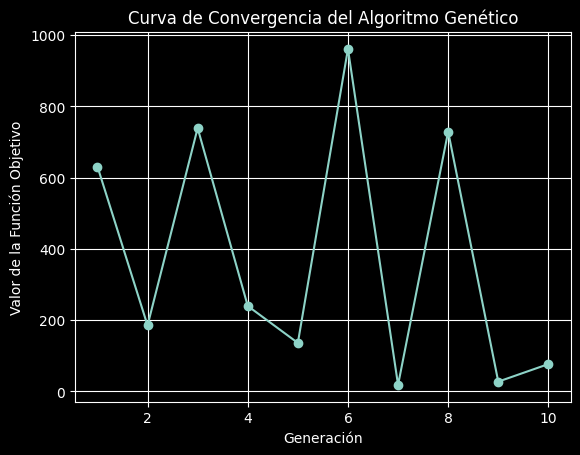

Mejor solución: 1.0 Aptitud: 0.9990009990009991
_________________________________________________________________________________



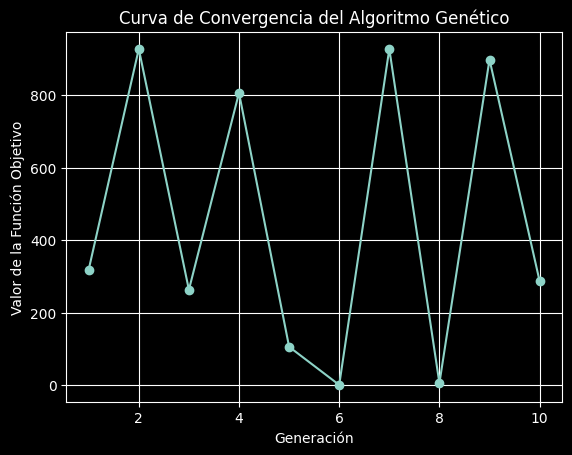

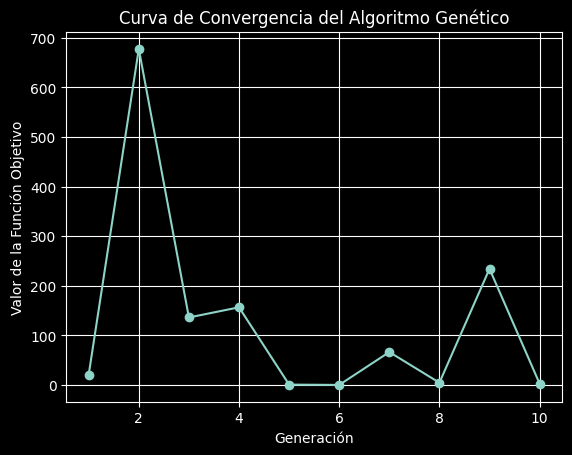

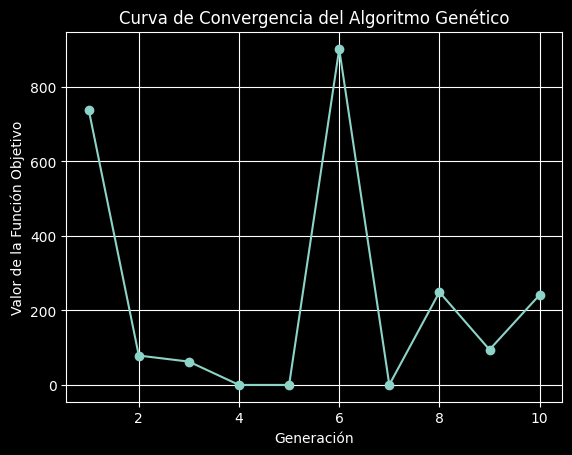

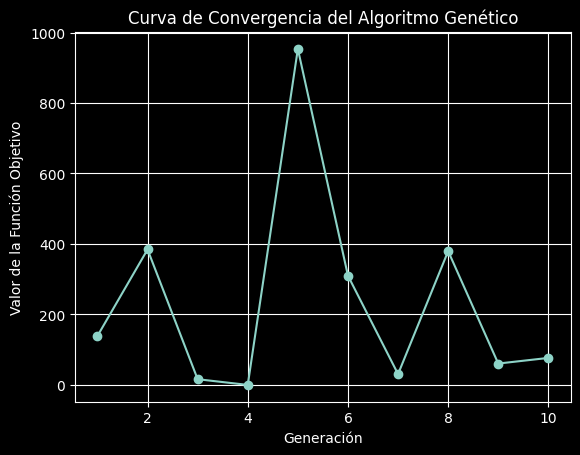

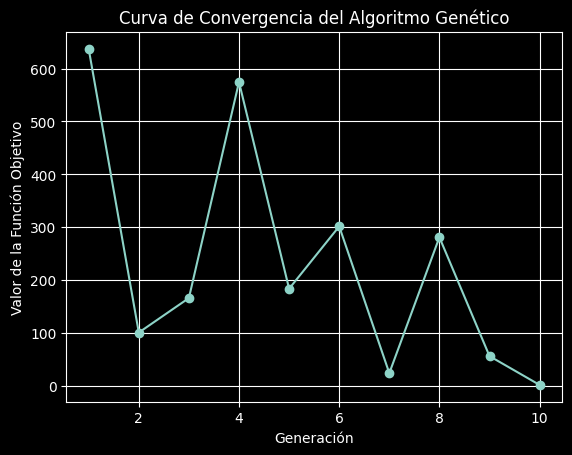

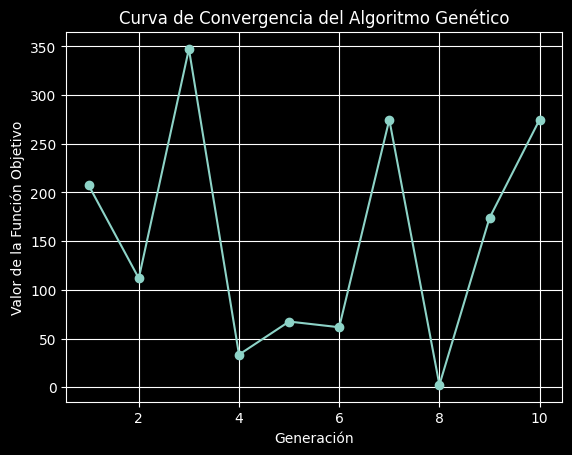

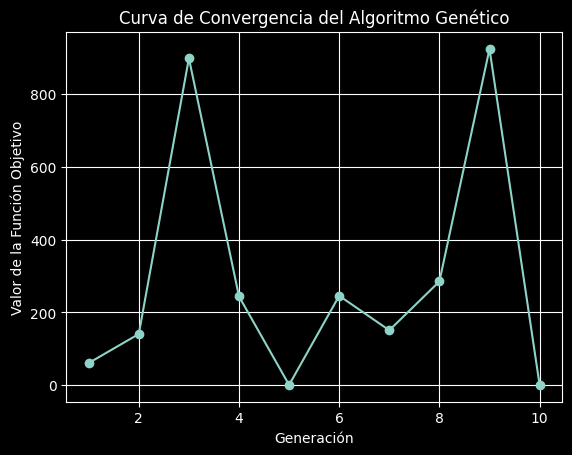

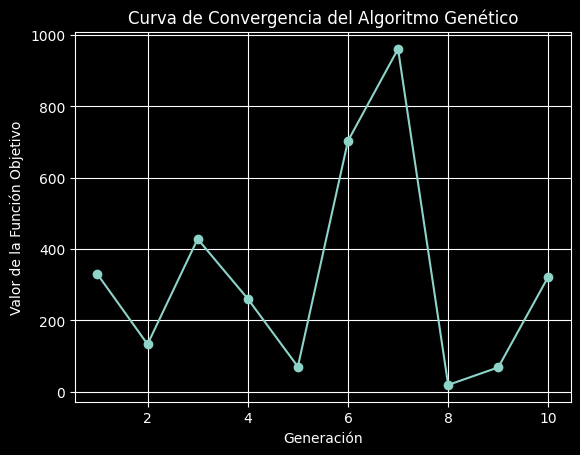

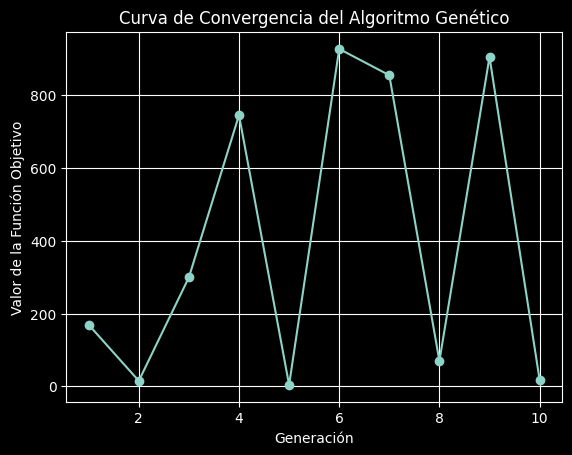

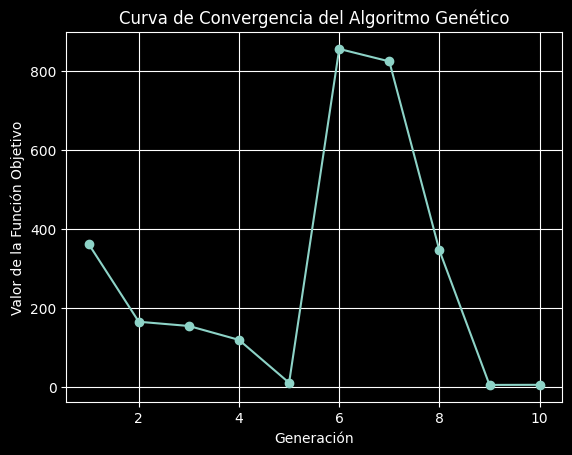

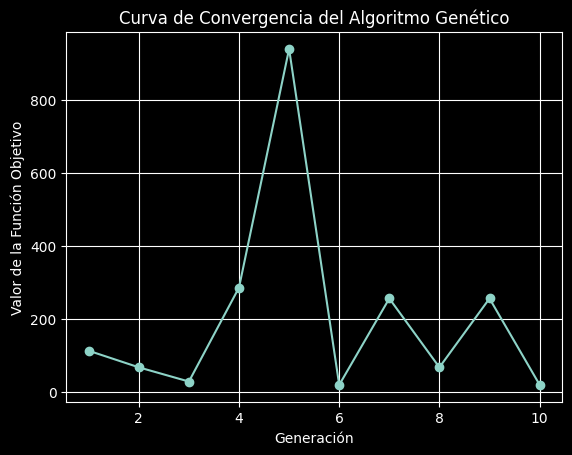

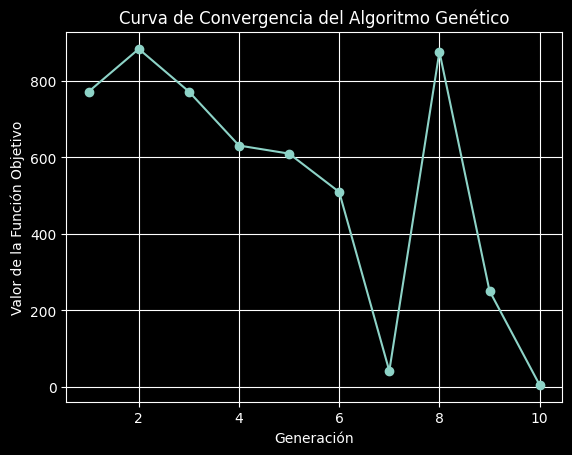

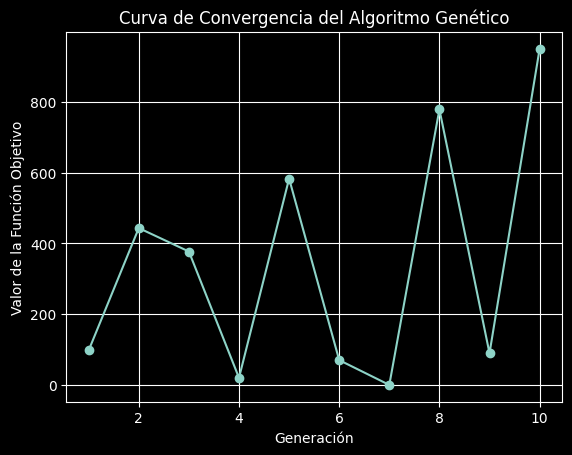

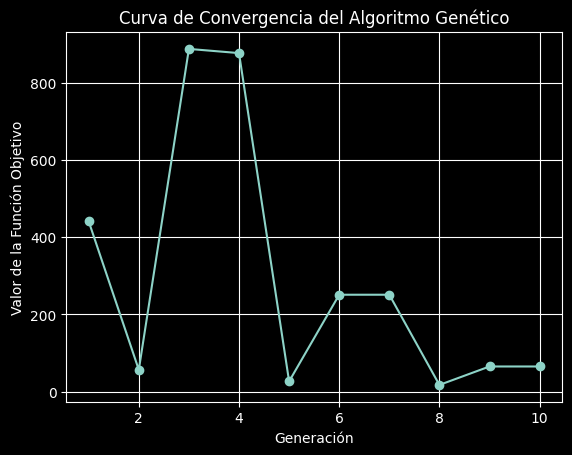

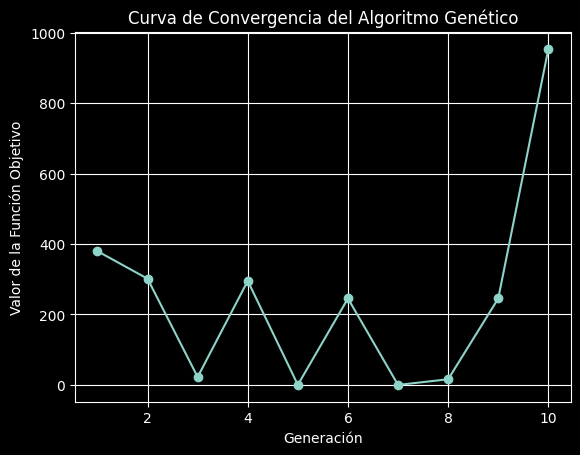

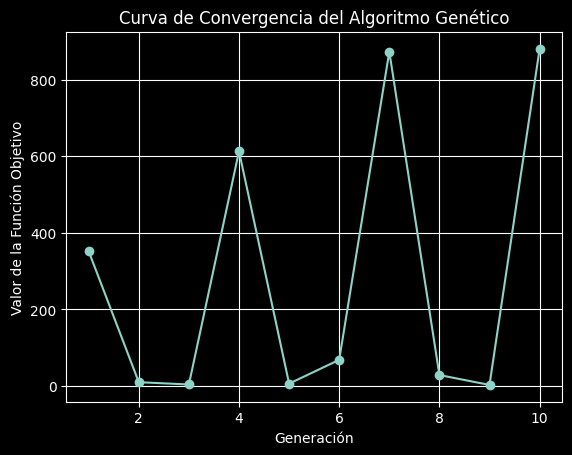

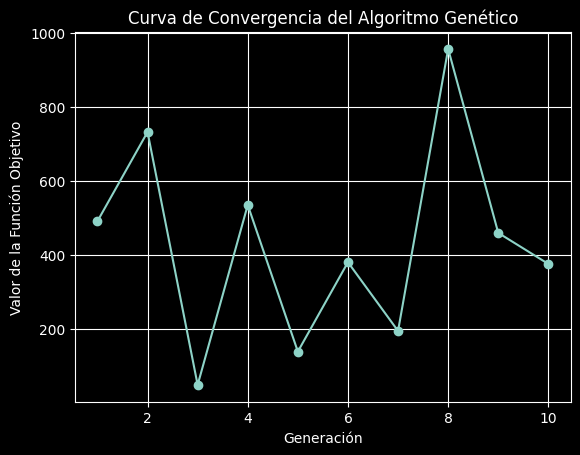

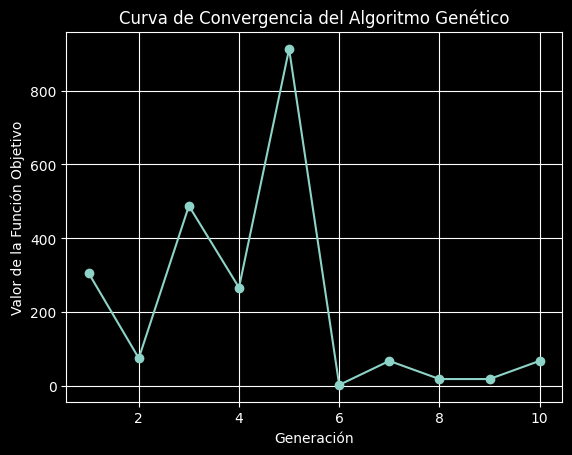

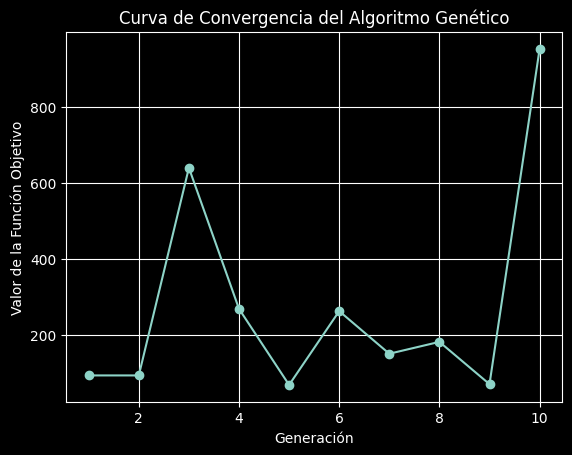

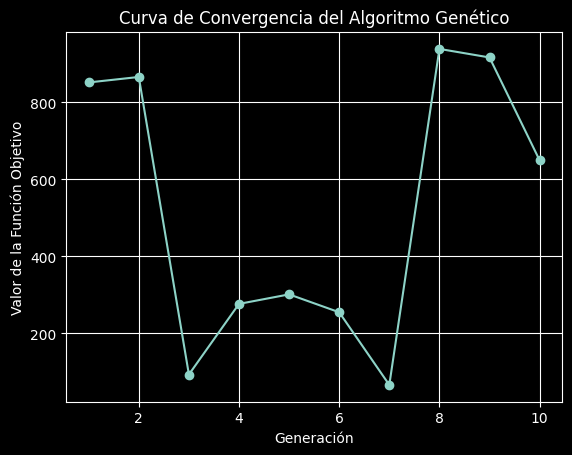

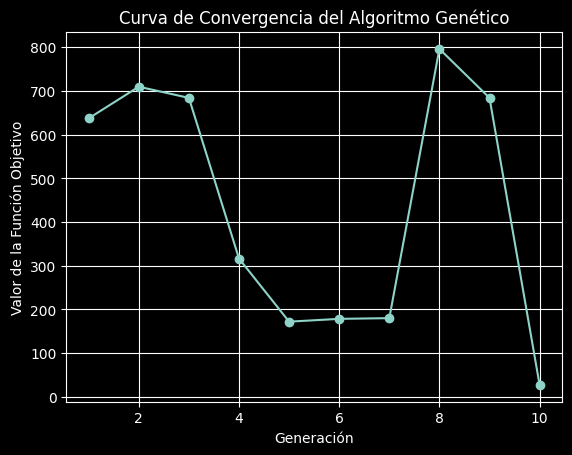

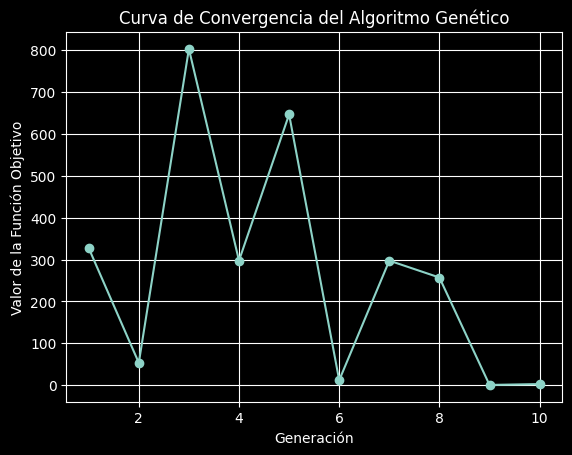

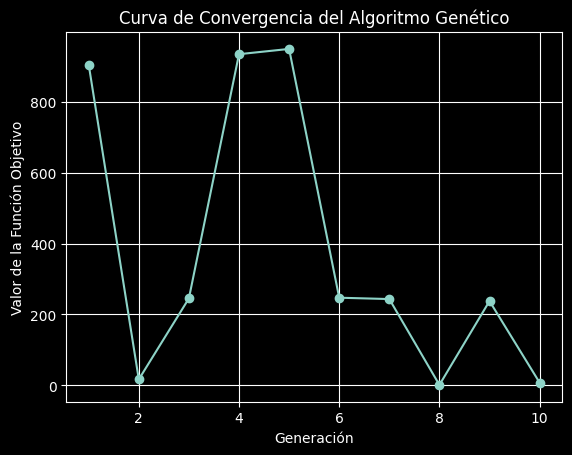

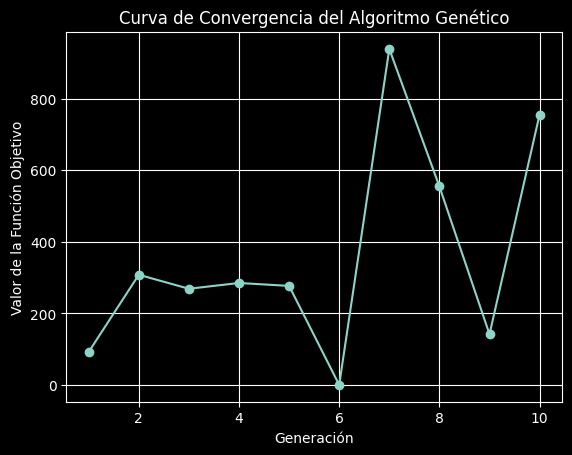

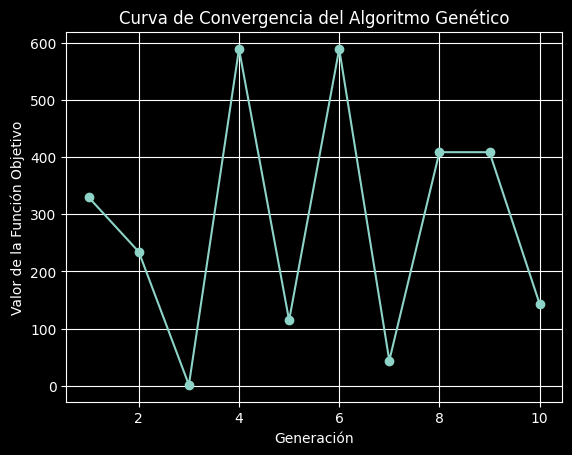

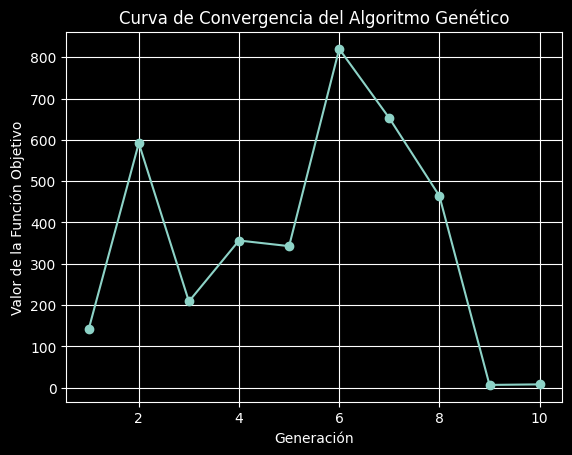

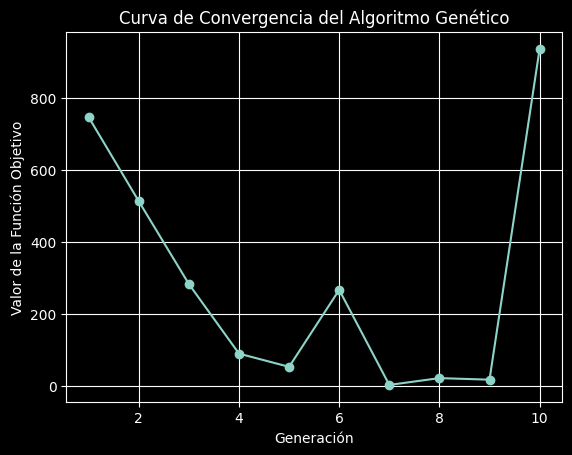

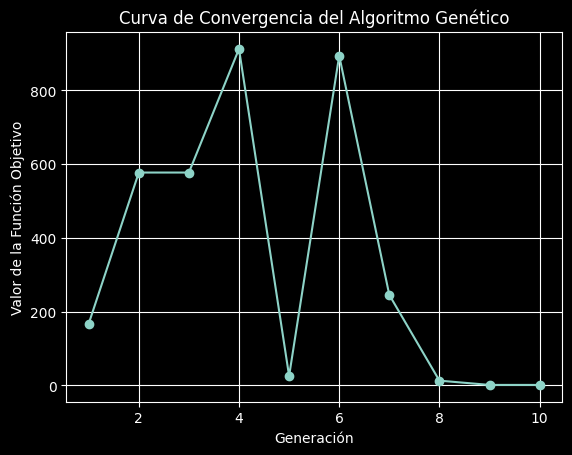

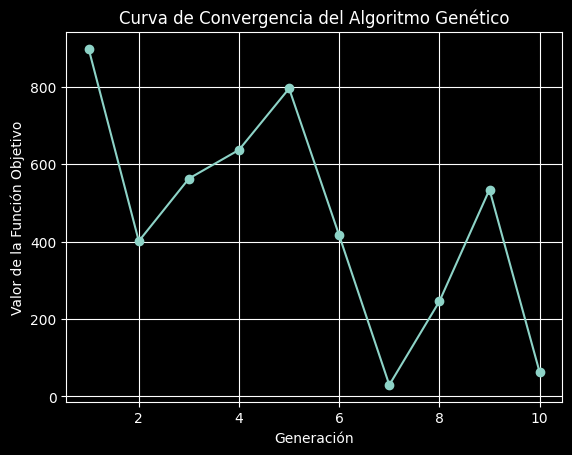

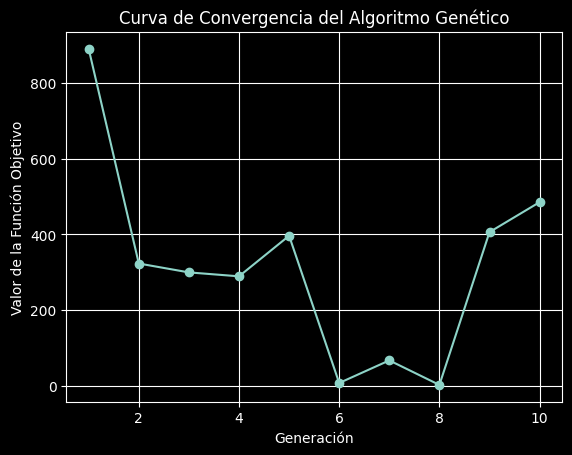


--- Resultados de 30 ejecuciones ---
Mínimo: -4.878787878787879
Promedio: -0.036363636363636216
Máximo: 4.212121212121211
Desviación Estándar: 1.6932390449733017


In [18]:
# -*- coding: utf-8 -*-
"""ae_ag_x2_min_torneo.ipynb

Automatically generated by Colab.

"""

#  -----------------------------------------------------------------
# Metaheuristica: Algoritmo genetico
# Metodo: Torneo
# Funcion objetivo: x^2
# Problema: Minimizacion
# Intervalo de variable de decision: [-31, 31]
# Pc = 0.85 (probabilidad de cruza)
# Pm = 0.09 (probabilidad de mutacion)
# Iteraciones o generaciones = 10
#  -----------------------------------------------------------------
import random

# parametros
TAMANIO_POBLACION = 4
LONGITUD_CROMOSOMA = 10
TASA_MUTACION = 0.09
TASA_CRUCE = 0.85
GENERACIONES = 10
X_MIN = -31
X_MAX = 31
EPSILON = 0.001  # valor pequeño para evitar division por cero en la funcion fitness
TAMANIO_TORNEO = 3  # tamaño del torneo

#  -----------------------------------------------------------------
# funcion para mapear el valor binario a un rango [-31, 31]
#  -----------------------------------------------------------------
def binario_a_decimal(cromosoma):
    decimal = int(cromosoma, 2)
    x = X_MIN + decimal * (X_MAX - X_MIN) / ((2 ** LONGITUD_CROMOSOMA) - 1)
    return x

#  -----------------------------------------------------------------
# funcion objetivo x^2
#  -----------------------------------------------------------------
def funcion_objetivo(x):
    return x ** 2

#  -----------------------------------------------------------------
# funcion fitness o tambien llamada funcion de aptitud (1/(x^2 + epsilon))
#  -----------------------------------------------------------------
def aptitud(cromosoma):
    x = binario_a_decimal(cromosoma)
    return 1 / (funcion_objetivo(x) + EPSILON)

#  -----------------------------------------------------------------
# se inicializa la poblacion
#  -----------------------------------------------------------------
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for _ in range(tamanio_poblacion):
        cromosoma = ''
        for _ in range(longitud_cromosoma):
            cromosoma = cromosoma + str(random.randint(0, 1))
        poblacion.append(cromosoma)
    return poblacion

#  -----------------------------------------------------------------
# seleccion por torneo
#  -----------------------------------------------------------------
def seleccion_torneo(poblacion, tamanio_torneo=TAMANIO_TORNEO):
    progenitores = []
    for _ in range(len(poblacion)):
        candidatos = random.sample(poblacion, tamanio_torneo)
        progenitor = max(candidatos, key=aptitud)  # se selecciona el mejor individuo del torneo
        progenitores.append(progenitor)
    return progenitores

#  -----------------------------------------------------------------
# cruce monopunto con probabilidad de cruza pc = 0.85
#  -----------------------------------------------------------------
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
    else:
        descendiente1, descendiente2 = progenitor1, progenitor2
    return descendiente1, descendiente2

#  -----------------------------------------------------------------
# Mutacion
#  -----------------------------------------------------------------
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ""
    for bit in cromosoma:
        if random.random() < tasa_mutacion:
            cromosoma_mutado = cromosoma_mutado + str(int(not int(bit)))
        else:
            cromosoma_mutado = cromosoma_mutado + bit
    return cromosoma_mutado

#  -----------------------------------------------------------------
# aplicacion de operadores geneticos
#  -----------------------------------------------------------------
def algoritmo_genetico_tor(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)
    mejor_funcion_objetivo_generaciones = []  # Lista para almacenar la aptitud del mejor individuo y grficar luego

    for generacion in range(generaciones):
        #print("Generación:", generacion + 1)

        #  -----------------------------------------------------------------
        # Seleccion de progenitores con el metodo torneo
        progenitores = seleccion_torneo(poblacion)

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, len(progenitores), 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # Mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # se reemplaza la poblacion con los descendientes mutados
        poblacion = descendientes_mutados

        # se muestra el mejor individuo de la generacion
        mejor_individuo = min(poblacion, key=aptitud)  # Buscar el mínimo para la aptitud
        mejor_funcion_objetivo_generaciones.append(funcion_objetivo(binario_a_decimal(mejor_individuo)))
        #print("Mejor individuo:", binario_a_decimal(mejor_individuo), "Aptitud:", aptitud(mejor_individuo))
        #print("_________________________________________________________________________________")

    # Graficar la evolución de la aptitud
    if plot:
        plt.plot(range(1, generaciones + 1), mejor_funcion_objetivo_generaciones, marker='o')
        plt.xlabel('Generación')
        plt.ylabel('Valor de la Función Objetivo')
        plt.title('Curva de Convergencia del Algoritmo Genético')
        plt.grid(True)
        plt.show()
    return max(poblacion, key=aptitud)  # Retornar el mejor individuo

#  -----------------------------------------------------------------
# Ejecucion principal del algoritmo genetico
#  -----------------------------------------------------------------
print("_________________________________________________________________________________")
print()
mejor_solucion = algoritmo_genetico_tor(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))


# -----------------------------------------------------------------
# Obtener resultados de 30 ejecuciones
# -----------------------------------------------------------------
def ejecutar_30_veces_tor(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    resultados = []

    for _ in range(30):
        mejor_individuo = algoritmo_genetico_tor(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones)
        valor_x = binario_a_decimal(mejor_individuo)
        resultados.append(valor_x)

    # Calcular estadísticas
    minimo = np.min(resultados)
    promedio = np.mean(resultados)
    maximo = np.max(resultados)
    desviacion_std = np.std(resultados)

    print("\n--- Resultados de 30 ejecuciones ---")
    print(f"Mínimo: {minimo}")
    print(f"Promedio: {promedio}")
    print(f"Máximo: {maximo}")
    print(f"Desviación Estándar: {desviacion_std}")

    return resultados, minimo, promedio, maximo, desviacion_std

# -----------------------------------------------------------------
# Ejecución principal del algoritmo genético con 30 ejecuciones
# -----------------------------------------------------------------
print("_________________________________________________________________________________")
print()
resultados_tor, minimo_tor, promedio_tor, maximo_tor, desviacion_std_tor = ejecutar_30_veces_tor(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)

### Ranking Lineal

_________________________________________________________________________________



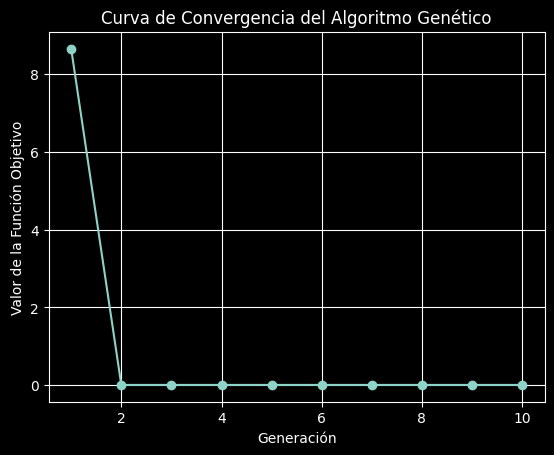

Mejor solución: -0.09090909090908994 Aptitud: 107.93933987511356
_________________________________________________________________________________



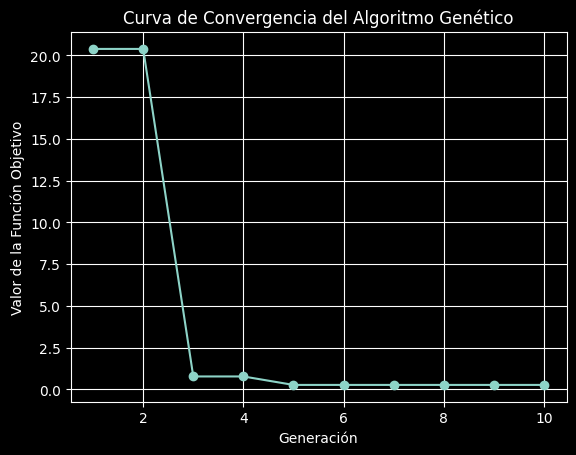

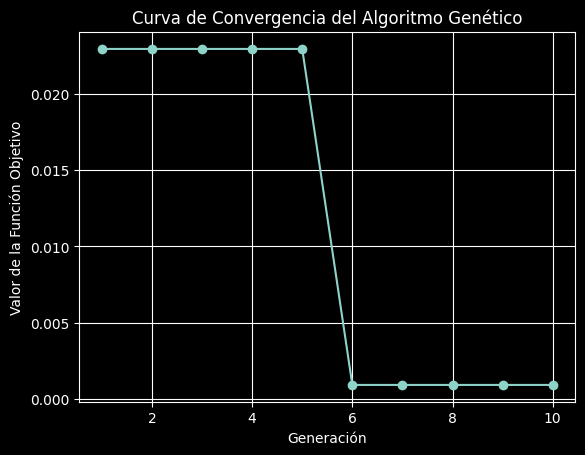

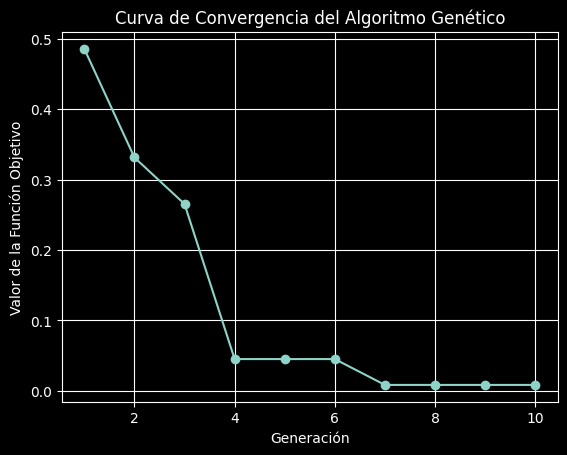

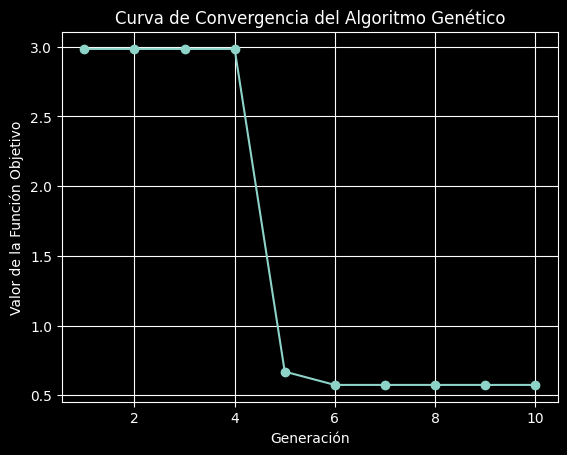

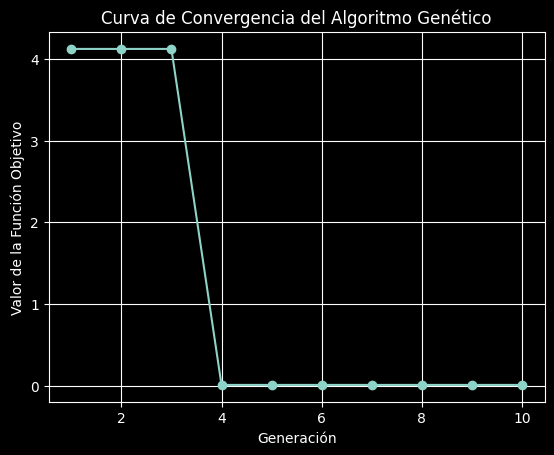

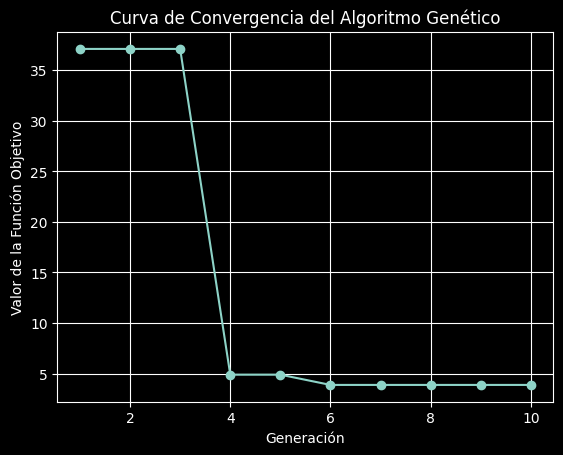

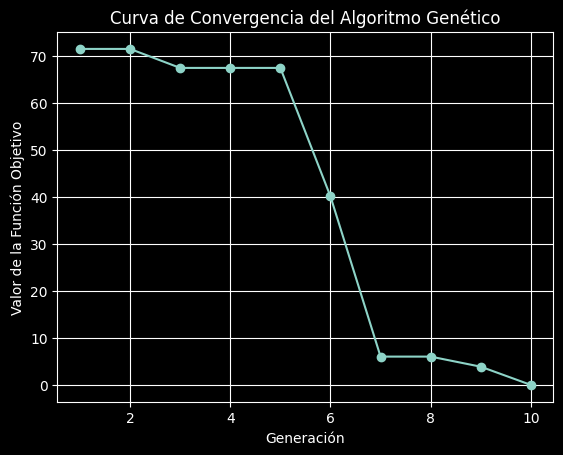

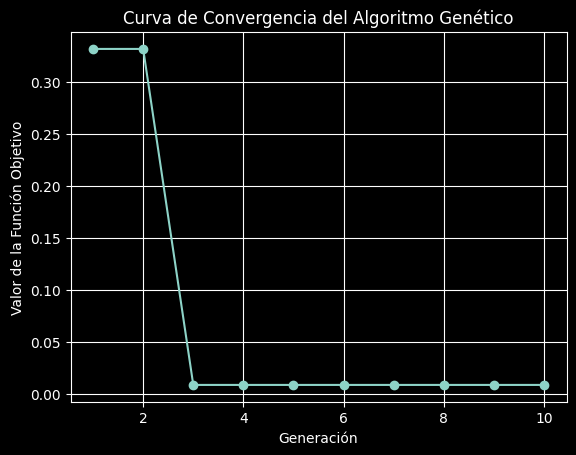

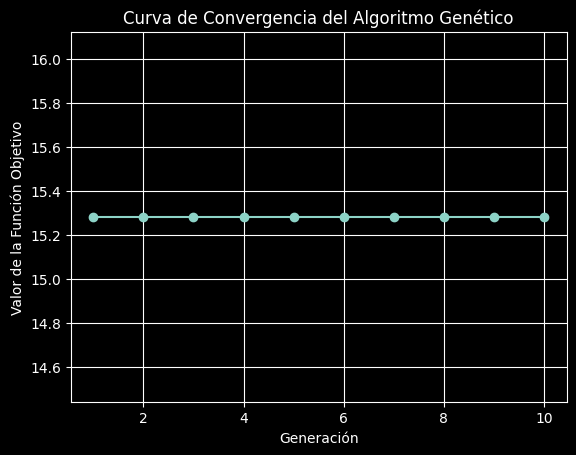

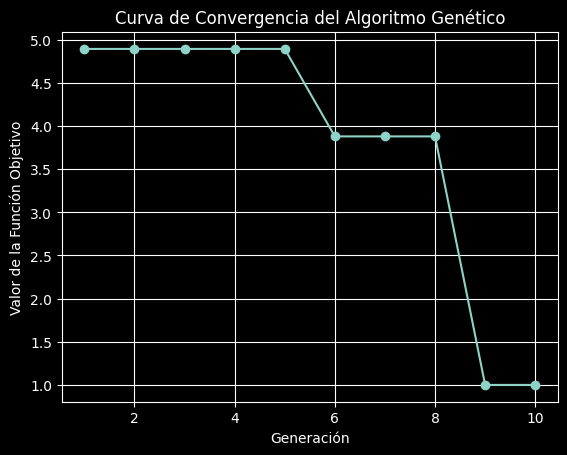

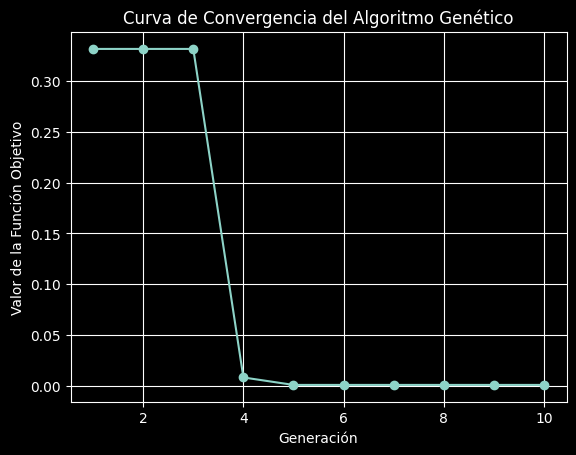

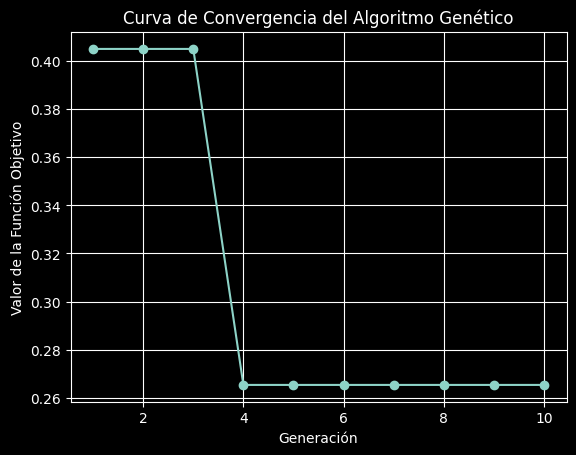

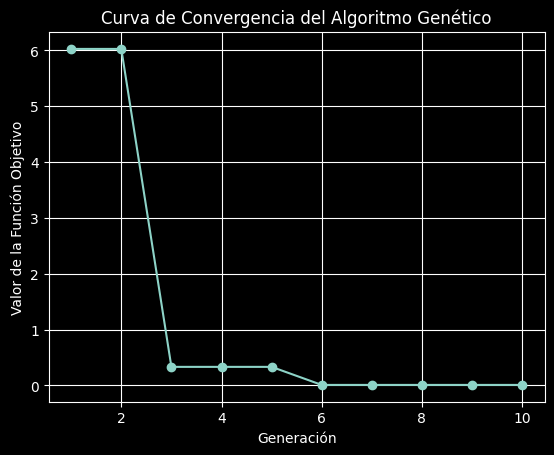

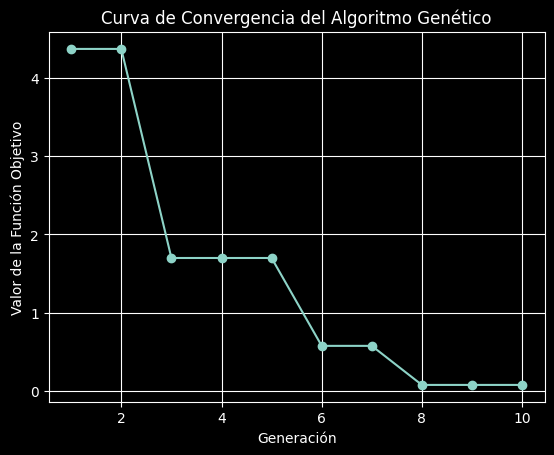

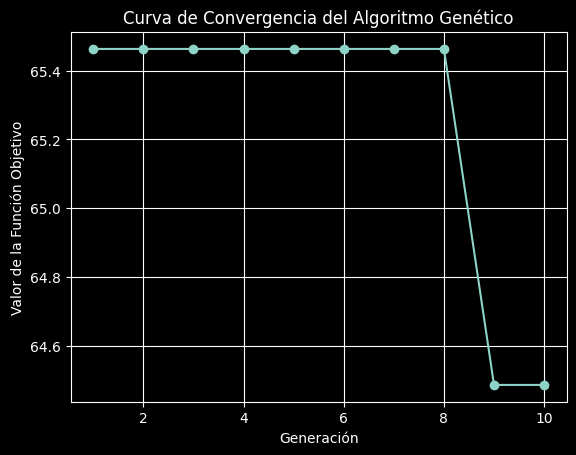

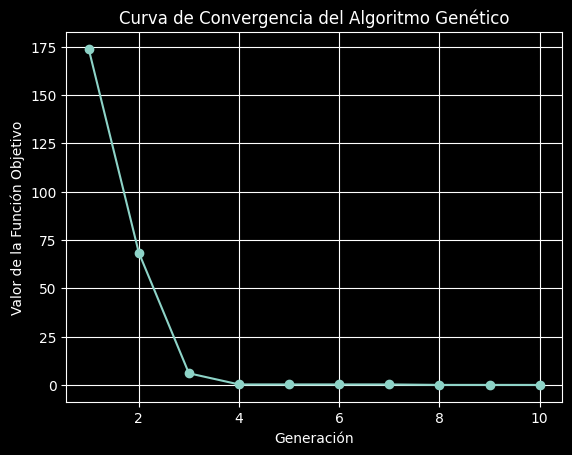

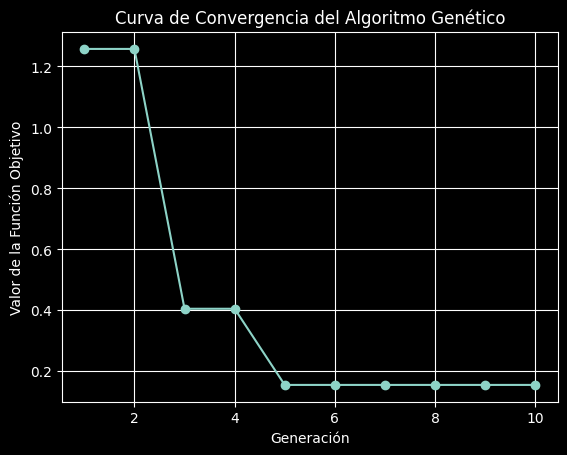

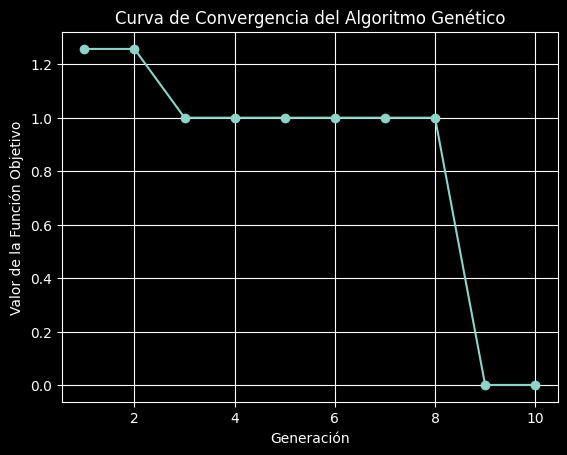

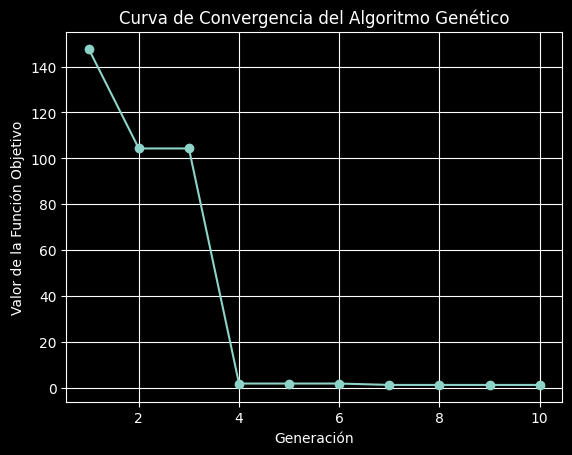

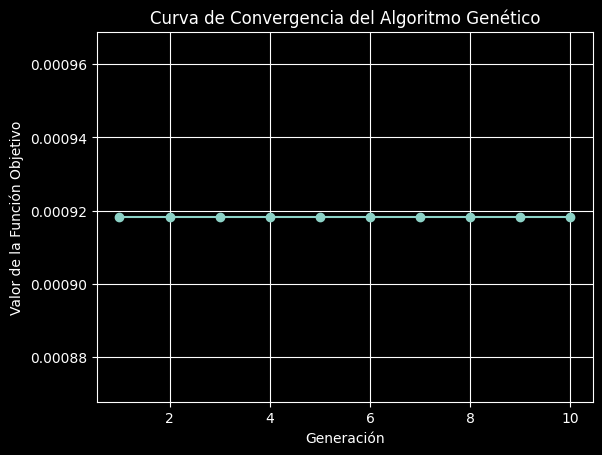

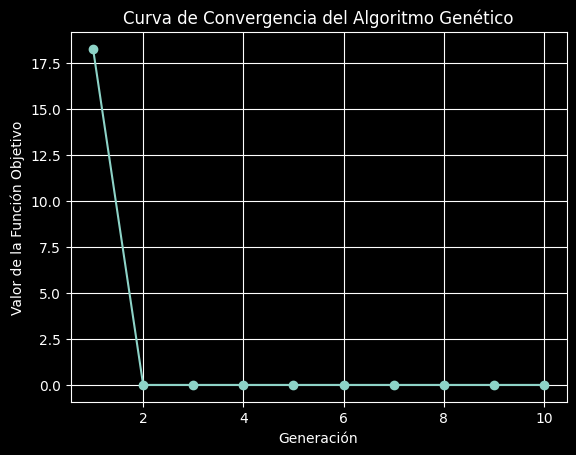

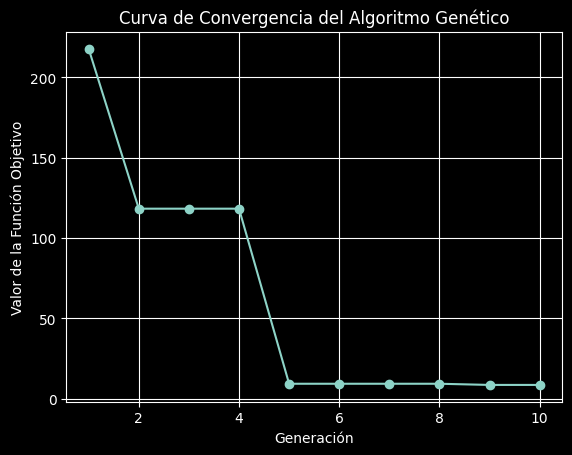

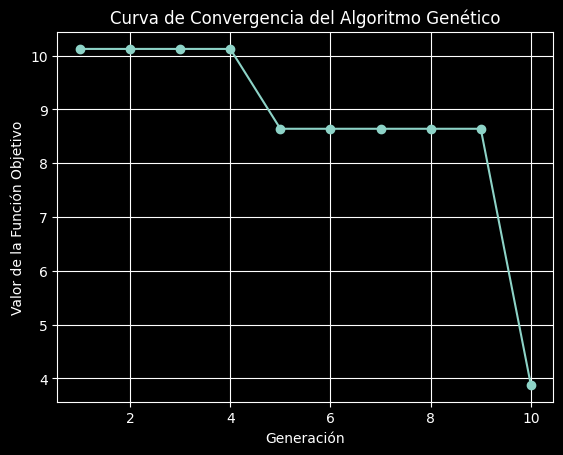

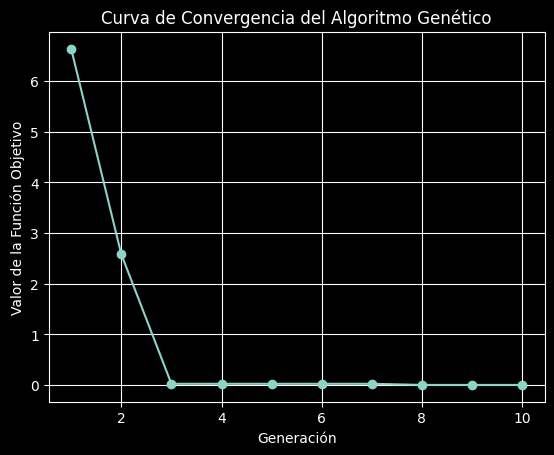

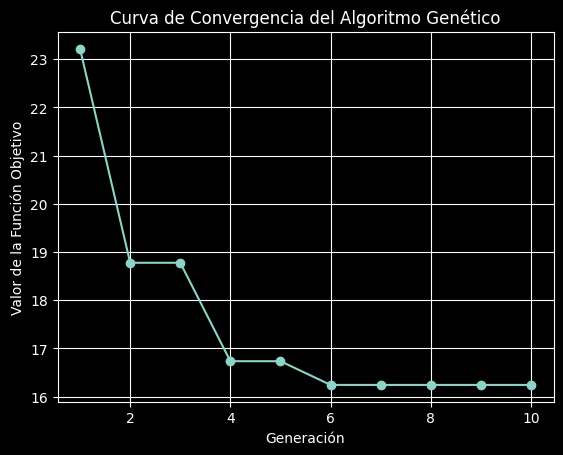

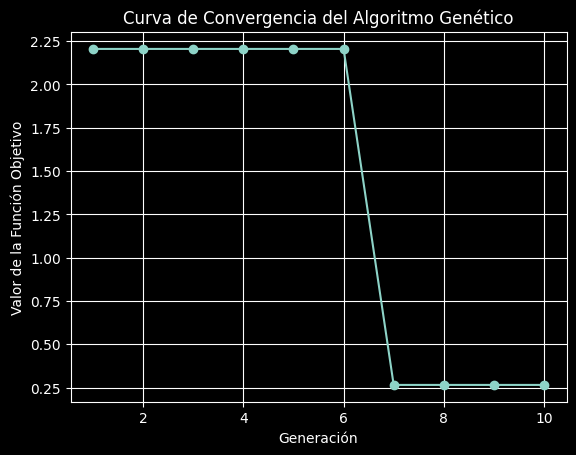

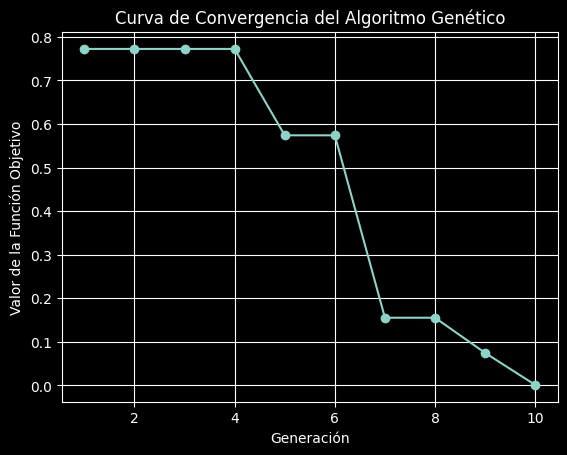

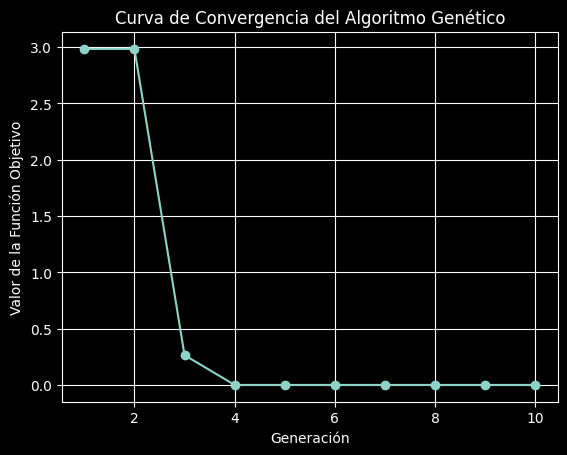

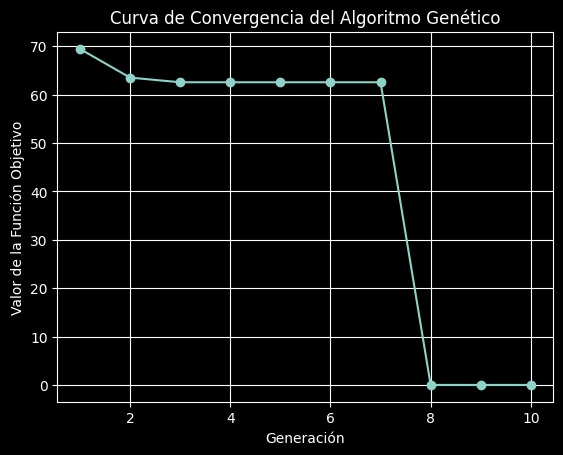

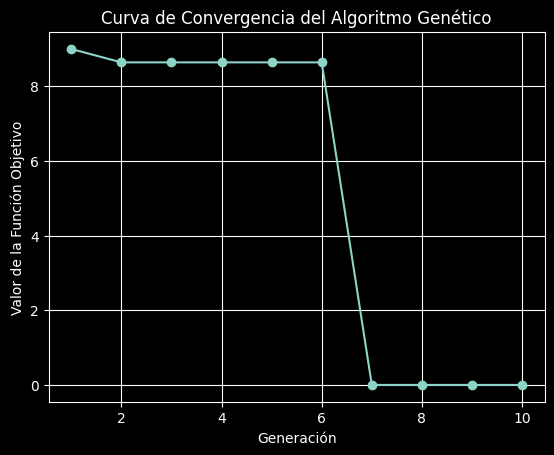


--- Resultados de 30 ejecuciones ---
Mínimo: -8.030303030303031
Promedio: -0.3212121212121211
Máximo: 3.9090909090909065
Desviación Estándar: 1.9426992036592743


In [19]:
# -*- coding: utf-8 -*-
"""ae_ag_x2_min_ranking_lineal.ipynb

Automatically generated by Colab.

"""

#  -----------------------------------------------------------------
# Metaheuristica: Algoritmo genetico
# Metodo: Ranking Lineal
# Funcion objetivo: x^2
# Problema: Minimizacion
# Intervalo de variable de decision: [-31, 31]
# Pc = 0.85 (probabilidad de cruza)
# Pm = 0.07 (probabilidad de mutacion)
# Iteraciones o generaciones = 10
#  -----------------------------------------------------------------
import random

# parametros
TAMANIO_POBLACION = 4
LONGITUD_CROMOSOMA = 10
TASA_MUTACION = 0.09
TASA_CRUCE = 0.7
GENERACIONES = 10
X_MIN = -31
X_MAX = 31
EPSILON = 0.001  # Valor pequeño para evitar división por cero en la funcion fitness


# -----------------------------------------------------------------
# funcion para mapear el valor binario a un rango [-31, 31]
# -----------------------------------------------------------------
def binario_a_decimal(cromosoma):
    decimal = int(cromosoma, 2)
    x = X_MIN + decimal * (X_MAX - X_MIN) / ((2 ** LONGITUD_CROMOSOMA) - 1)
    return x


# -----------------------------------------------------------------
# funcion objetivo x^2
# -----------------------------------------------------------------
def funcion_objetivo(x):
    return x ** 2


# -----------------------------------------------------------------
# funcion fitness o tambien llamada funcion de aptitud (1/(x^2 + epsilon))
# -----------------------------------------------------------------
def aptitud(cromosoma):
    x = binario_a_decimal(cromosoma)
    return 1 / (funcion_objetivo(x) + EPSILON)


# -----------------------------------------------------------------
# se inicializa la poblacion
# -----------------------------------------------------------------
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for _ in range(tamanio_poblacion):
        cromosoma = ''
        for _ in range(longitud_cromosoma):
            cromosoma = cromosoma+str(random.randint(0, 1))
        poblacion.append(cromosoma)
    return poblacion


# -----------------------------------------------------------------
# seleccion por ranking lineal
# -----------------------------------------------------------------
def seleccion_ranking(poblacion):
    # se calcula la aptitud de cada individuo
    aptitudes = []
    for individuo in poblacion:
        aptitudes.append(aptitud(individuo))

    # se ordena la poblacion por aptitud (mayor aptitud es mejor)
    # x es la tupla de zip, de la cual se toma el segundo elemento (x[1]) para
    # ser ordenada la tupla por ese elemento, en este caso por aptitud
    poblacion_ordenada = sorted(zip(poblacion, aptitudes), key=lambda x: x[1])

    # se calcula probabilidades segun el ranking lineal
    N = len(poblacion)
    s = 1.7  # Factor de seleccion comunmente usado
    probabilidades = []
    for i in range(N):
        prob = (2 - s) / N + (2 * i * (s - 1)) / (N * (N - 1))
        probabilidades.append(prob)

    # se selecciona un progenitor basado en las probabilidades
    r = random.random()
    suma = 0
    for i in range(N):
        suma = suma + probabilidades[i]
        if r <= suma:
            return poblacion_ordenada[i][0]  # se retornar el cromosomas


# -----------------------------------------------------------------
# Cruce monopunto con probabilidad de cruza pc = 0.92
# -----------------------------------------------------------------
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
    else:
        descendiente1, descendiente2 = progenitor1, progenitor2
    return descendiente1, descendiente2


# -----------------------------------------------------------------
# Mutacion
# -----------------------------------------------------------------
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ""
    for bit in cromosoma:
        if random.random() < tasa_mutacion:
            cromosoma_mutado = cromosoma_mutado+str(int(not int(bit)))
        else:
            cromosoma_mutado = cromosoma_mutado + bit
    return cromosoma_mutado


# -----------------------------------------------------------------
# aplicacion de operadores geneticos
# -----------------------------------------------------------------
def algoritmo_genetico_ran(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)
    mejor_funcion_objetivo_generaciones = []  # Lista para almacenar la aptitud del mejor individuo y grficar luego

    for generacion in range(generaciones):
        #print("Generación:", generacion + 1)

        # seleccion de progenitores con el metodo de ranking lineal
        progenitores = []
        for _ in range(tamanio_poblacion):
            progenitores.append(seleccion_ranking(poblacion))

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, len(progenitores), 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # Mutacion
        #  -----------------------------------------------------------------
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # Aquí se aplica elitismo
        # Se reemplazan los peores cromosomas con los mejores progenitores
        poblacion.sort(key=aptitud)  # se ordena la poblacion por aptitud en forma ascendente
        # se ordena los descendientes por aptitud en forma descendente
        descendientes_mutados.sort(key=aptitud, reverse=True)
        for i in range(len(descendientes_mutados)):
            if aptitud(descendientes_mutados[i]) > aptitud(poblacion[i]):
                poblacion[i] = descendientes_mutados[i]

        # Mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)
        mejor_funcion_objetivo_generaciones.append(funcion_objetivo(binario_a_decimal(mejor_individuo)))
        #print("Mejor individuo:", binario_a_decimal(mejor_individuo), "Aptitud:", aptitud(mejor_individuo))
        #print("_________________________________________________________________________________")

    # Graficar la evolución de la aptitud
    if plot:
        plt.plot(range(1, generaciones + 1), mejor_funcion_objetivo_generaciones, marker='o')
        plt.xlabel('Generación')
        plt.ylabel('Valor de la Función Objetivo')
        plt.title('Curva de Convergencia del Algoritmo Genético')
        plt.grid(True)
        plt.show()
    return max(poblacion, key=aptitud)  # se retorna el mejor individuo


# ejecucion principal del algoritmo genetico
print("_________________________________________________________________________________")
print()
mejor_solucion = algoritmo_genetico_ran(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))


import random
import numpy as np

# -----------------------------------------------------------------
# Obtener resultados de 30 ejecuciones
# -----------------------------------------------------------------
def ejecutar_30_veces_ran(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    resultados = []

    for _ in range(30):
        mejor_individuo = algoritmo_genetico_ran(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones)
        valor_x = binario_a_decimal(mejor_individuo)
        resultados.append(valor_x)

    # Calcular estadísticas
    minimo = np.min(resultados)
    promedio = np.mean(resultados)
    maximo = np.max(resultados)
    desviacion_std = np.std(resultados)

    print("\n--- Resultados de 30 ejecuciones ---")
    print(f"Mínimo: {minimo}")
    print(f"Promedio: {promedio}")
    print(f"Máximo: {maximo}")
    print(f"Desviación Estándar: {desviacion_std}")

    return resultados, minimo, promedio, maximo, desviacion_std

# -----------------------------------------------------------------
# Ejecución principal del algoritmo genético con 30 ejecuciones
# -----------------------------------------------------------------
print("_________________________________________________________________________________")
print()
resultados_ran, minimo_ran, promedio_ran, maximo_ran, desviacion_std_ran = ejecutar_30_veces_ran(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)

In [41]:
print(min(resultados_ran))
print(min(resultados_rul))
print(min(resultados_tor))
print(max(resultados_ran))
print(max(resultados_rul))
print(max(resultados_tor))

-8.030303030303031
-1.9696969696969688
-4.878787878787879
3.9090909090909065
7.969696969696969
4.212121212121211


In [9]:
import pandas as pd

In [20]:
df2 = pd.DataFrame({
    'Solución Ranking': resultados_ran,
    'Solución Ruleta': resultados_rul,
    'Solución Torneo': resultados_tor
})
df2.index = range(1, len(df2) + 1)
df2.index.name = 'Lanzamiento'
df2.head(30)

Solución Ranking  Solución Ruleta  Solución Torneo
Lanzamiento                                                    
1                   -0.515152         0.151515         0.212121
2                    0.030303         0.030303         0.393939
3                   -0.090909         0.090909         0.030303
4                    0.757576         0.515152        -0.030303
5                   -0.090909         0.636364         0.272727
6                    1.969697        -0.272727        -1.060606
7                    0.030303        -1.969697         0.151515
8                   -0.090909         0.212121         0.575758
9                    3.909091         0.151515         0.818182
10                  -1.000000        -0.030303         0.090909
11                  -0.030303         0.090909        -0.090909
12                   0.515152        -0.212121        -0.333333
13                  -0.090909         0.757576        -0.151515
14                   0.272727         1.181818        -0.333333
15                  -8.030303        -0.030303        -0.151515
16                  -0.090909        -0.090909         1.363636
17                   0.393939         0.030303         4.030303
18                  -0.030303         0.333333        -0.090909
19                   1.121212        -0.090909        -0.151515
20                  -0.030303        -0.090909        -2.212121
21                  -0.030303         1.181818        -4.878788
22                  -2.939394         0.030303         0.515152
23                  -1.969697         0.272727        -0.090909
24                  -0.030303         0.030303        -4.212121
25                  -4.030303         7.969697         4.212121
26                   0.515152        -0.272727        -0.636364
27                  -0.030303         0.636364         0.454545
28                  -0.030303        -0.030303        -0.212121
29                   0.030303         5.848485         0.151515
30                  -0.030303        -0.030303         0.272727

b. Completar la siguiente tabla en base a las 30 
ejecuciones con los parámetros señalados

In [21]:
df3 = pd.DataFrame({
    'Mínimo': [minimo_ran,minimo_rul,minimo_tor],
    'Promedio': [promedio_ran,promedio_rul,promedio_tor],
    'Máximo': [maximo_ran,maximo_rul,maximo_tor],
    'Desv Est': [desviacion_std_ran,desviacion_std_rul,desviacion_std_tor]
})

df3.index=['Ranking','Ruleta','Torneo']
df3.head()

Mínimo  Promedio    Máximo  Desv Est
Ranking -8.030303 -0.321212  3.909091  1.942699
Ruleta  -1.969697  0.567677  7.969697  1.797167
Torneo  -4.878788 -0.036364  4.212121  1.693239

c. Explicar una interpretación de los 
resultados obtenidos en el ítem anterior.

Para llevar a cabo el análisis de los 3 algoritmos en función de los valores obtenidos, se corrió el código 5 veces, siendo los valores de la última ejecución los mostrados en la tabla. A partir de los valores obtenidos se concluye que:

1. Análisis del Algoritmo de Ranking:
- Rango de valores: El valor mínimo ha variado considerablemente, desde -8.030303 hasta -1.000000, y el valor máximo ha oscilado entre 1.242424 y 7.787879. Esto indica que el algoritmo de ranking tiene una tendencia a producir tanto soluciones subóptimas como soluciones relativamente buenas, aunque en varias ocasiones los valores mínimos pueden ser negativos y alejados del óptimo.
- Promedio: Los promedios han mostrado una fluctuación importante, desde valores negativos hasta positivos, con algunos resultados cercanos a cero. En general, esto sugiere que, aunque el algoritmo de ranking tiene la capacidad de encontrar soluciones óptimas, también puede generar resultados no tan favorables en muchas ejecuciones.
- Desviación Estándar: La variabilidad de los resultados es moderada, con desviaciones estándar generalmente entre 0.4 y 2.1, lo que indica que las soluciones pueden ser algo impredecibles, pero no en extremo.<br>
- Conclusión General del Ranking:

El algoritmo de ranking tiene un comportamiento mixto, con una tendencia a ser inconsistente en su rendimiento. Si bien puede encontrar soluciones buenas (con valores máximos relativamente altos), en muchas ocasiones los valores mínimos obtenidos no son satisfactorios, y el promedio de las ejecuciones tiende a ser bajo o cercano a cero. Sin embargo, la variabilidad no es tan alta como en otros algoritmos, lo que sugiere que sus resultados son más predecibles, aunque no siempre óptimos.<br><br>
2. Análisis del Algoritmo de Ruleta:
- Rango de valores: Los valores mínimos y máximos obtenidos por la ruleta también han variado significativamente, con mínimos que van desde -3.909091 hasta -1.969697 y máximos que llegan hasta 7.969697. Aunque los máximos no son tan altos como los del algoritmo de torneo, la ruleta parece ser más consistente en obtener valores moderadamente altos.
- Promedio: En general, los promedios obtenidos por el algoritmo de ruleta han sido positivos en varias de las ejecuciones, lo que sugiere una tendencia más favorable en comparación con el ranking. Esto indica que el algoritmo de ruleta tiende a generar soluciones más equilibradas, aunque no necesariamente las mejores.
- Desviación Estándar: La desviación estándar de ruleta es moderada, con valores entre 0.9 y 1.8. Esto indica que las soluciones obtenidas son relativamente consistentes, sin demasiada dispersión.<br>
- Conclusión General de Ruleta:

El algoritmo de ruleta ha mostrado ser más consistente y estable que el ranking, con valores promedio mayormente positivos y una menor dispersión en los resultados. Aunque no ha alcanzado valores máximos tan altos como otros algoritmos, tiene un rendimiento más equilibrado. Es un buen candidato cuando se busca estabilidad en las soluciones y menor riesgo de obtener soluciones muy malas.<br><br>
3. Análisis del Algoritmo de Torneo:
- Rango de valores: El torneo es el algoritmo que ha mostrado tanto los mejores resultados (con un valor máximo de 8.757576) como los peores (con un valor mínimo de -7.909091). Esto refleja la alta variabilidad del torneo, que en ocasiones puede obtener soluciones extremadamente buenas, pero también soluciones bastante pobres.
- Promedio: A lo largo de las ejecuciones, los promedios del torneo han sido generalmente positivos, lo que indica que, en promedio, el algoritmo tiende a encontrar soluciones razonablemente buenas, aunque su alta variabilidad puede disminuir esta tendencia en algunas ejecuciones.
- Desviación Estándar: El torneo ha mostrado la desviación estándar más alta de todos los algoritmos (hasta 2.2), lo que sugiere que los resultados pueden ser bastante impredecibles, con una amplia dispersión de soluciones.<br>
- Conclusión General del Torneo:

El algoritmo de torneo es el más variable y presenta la mayor capacidad para encontrar soluciones óptimas, aunque con una alta dispersión. Puede ser una opción interesante si se busca maximizar el valor óptimo, pero presenta el riesgo de obtener soluciones subóptimas en muchas ejecuciones. La alta variabilidad sugiere que puede ser necesario ejecutarlo varias veces para obtener buenos resultados de manera consistente.<br><br>
#### Comparación General de los Algoritmos:
- Consistencia: El algoritmo de Ruleta ha sido el más consistente, con una menor variabilidad y promedios generalmente positivos. Esto lo hace una buena opción cuando se desea estabilidad en los resultados y se prefiere evitar soluciones extremas.
- Mejores Resultados Máximos: Torneo es el algoritmo que ha encontrado los valores máximos más altos, pero también es el más variable y riesgoso. Si el objetivo es obtener soluciones óptimas, este algoritmo puede ser preferible, aunque con la advertencia de que los resultados pueden variar mucho.
- Mejor Promedio: Aunque el Ranking ha tenido promedios cercanos a cero o incluso negativos, en algunas ejecuciones ha mostrado un rendimiento más balanceado en términos de la relación entre el valor mínimo y el máximo. Sin embargo, la inconsistencia y la tendencia a resultados negativos pueden ser un inconveniente. <br>
- Conclusión Final: <br>
Si se busca estabilidad y resultados consistentes, el algoritmo de Ruleta es probablemente la mejor opción.<br>
Si se desea maximizar el valor óptimo, aunque con un mayor riesgo de obtener soluciones subóptimas, el algoritmo de Torneo sería el indicado.<br>
Ranking puede ser una opción intermedia, aunque es menos predecible y tiende a generar valores más cercanos a cero, lo que puede no ser deseable dependiendo del objetivo del proyecto.

d. Modificar los parámetros Pm, Tamaño de la población y
Generaciones de modo tal que se consiga encontrar una combinación 
que permita obtener el mejor valor óptimo y su correspondiente solución 
(para cada algoritmo habrá una combinación diferente). Transcribir las 
combinaciones encontradas en el .pdf

In [94]:
plot = False

import itertools

def probar_combinaciones(algoritmo, lista_pm, lista_poblacion, lista_generaciones, longitud_cromosoma, tasa_cruce):
    # Generar todas las combinaciones posibles de los valores en las tres listas
    combinaciones = list(itertools.product(lista_pm, lista_poblacion, lista_generaciones))
    
    resultados_combinaciones = []

    for Pm, poblacion, generaciones in combinaciones:
        print(f"\nProbando con Pm: {Pm}, Población: {poblacion}, Generaciones: {generaciones}")

        if algoritmo == 'ranking':
            resultados, minimo, promedio, maximo, desviacion_std = ejecutar_30_veces_ran(
                poblacion, longitud_cromosoma, Pm, tasa_cruce, generaciones
            )
        elif algoritmo == 'ruleta':
            resultados, minimo, promedio, maximo, desviacion_std = ejecutar_30_veces_rul(
                poblacion, longitud_cromosoma, Pm, tasa_cruce, generaciones
            )
        elif algoritmo == 'torneo':
            resultados, minimo, promedio, maximo, desviacion_std = ejecutar_30_veces_tor(
                poblacion, longitud_cromosoma, Pm, tasa_cruce, generaciones
            )
        else:
            print(f"Algoritmo {algoritmo} no reconocido")
            continue

        resultados_combinaciones.append({
            'Resultados': resultados,
            'Pm': Pm,
            'poblacion': poblacion,
            'generaciones': generaciones,
            'minimo': minimo,
            'promedio': promedio,
            'maximo': maximo,
            'desviacion_std': desviacion_std
        })

    return resultados_combinaciones

lista_pm = [0.01, 0.05, 0.09, 0.2, 0.3]
lista_poblacion = [4, 6, 8, 10, 12]
lista_generaciones = [8, 10, 12, 16, 20, 24]

resultados_ranking = probar_combinaciones('ranking', lista_pm, lista_poblacion, lista_generaciones, LONGITUD_CROMOSOMA, TASA_CRUCE)
resultados_ruleta = probar_combinaciones('ruleta', lista_pm, lista_poblacion, lista_generaciones, LONGITUD_CROMOSOMA, TASA_CRUCE)
resultados_torneo = probar_combinaciones('torneo', lista_pm, lista_poblacion, lista_generaciones, LONGITUD_CROMOSOMA, TASA_CRUCE)


Probando con Pm: 0.01, Población: 4, Generaciones: 8

--- Resultados de 30 ejecuciones ---
Mínimo: -18.090909090909093
Promedio: -0.14141414141414171
Máximo: 12.272727272727273
Desviación Estándar: 8.397181787556349

Probando con Pm: 0.01, Población: 4, Generaciones: 10

--- Resultados de 30 ejecuciones ---
Mínimo: -8.939393939393938
Promedio: 0.1474747474747475
Máximo: 15.18181818181818
Desviación Estándar: 5.231533811982459

Probando con Pm: 0.01, Población: 4, Generaciones: 12

--- Resultados de 30 ejecuciones ---
Mínimo: -8.09090909090909
Promedio: 0.9313131313131311
Máximo: 11.848484848484851
Desviación Estándar: 4.627852049314879

Probando con Pm: 0.01, Población: 4, Generaciones: 16

--- Resultados de 30 ejecuciones ---
Mínimo: -9.0
Promedio: 0.9252525252525251
Máximo: 15.060606060606062
Desviación Estándar: 5.055351613965379

Probando con Pm: 0.01, Población: 4, Generaciones: 20

--- Resultados de 30 ejecuciones ---
Mínimo: -15.545454545454545
Promedio: -0.6565656565656562
Máx

In [95]:
def obtener_mejor_combinacion(resultados_combinaciones, criterio='maximo'):
    # Encuentra la combinación con el mejor valor según el criterio
    mejor_combinacion = max(resultados_combinaciones, key=lambda x: x[criterio])
    
    print(f"\n--- Mejor combinación según {criterio} ---")
    print(f"Pm: {mejor_combinacion['Pm']}")
    print(f"Población: {mejor_combinacion['poblacion']}")
    print(f"Generaciones: {mejor_combinacion['generaciones']}")
    print(f"Mínimo: {mejor_combinacion['minimo']}")
    print(f"Promedio: {mejor_combinacion['promedio']}")
    print(f"Máximo: {mejor_combinacion['maximo']}")
    print(f"Desviación Estándar: {mejor_combinacion['desviacion_std']}")
    
    return mejor_combinacion

print('Ranking')
mejor_combinacion_ranking = obtener_mejor_combinacion(resultados_ranking, criterio='maximo')
print('\n')
print('Ruleta')
mejor_combinacion_ruleta = obtener_mejor_combinacion(resultados_ruleta, criterio='maximo')
print('\n')
print('Torneo')
mejor_combinacion_torneo = obtener_mejor_combinacion(resultados_torneo, criterio='maximo')

Ranking

--- Mejor combinación según maximo ---
Pm: 0.01
Población: 4
Generaciones: 20
Mínimo: -15.545454545454545
Promedio: -0.6565656565656562
Máximo: 16.575757575757578
Desviación Estándar: 5.301612123981886


Ruleta

--- Mejor combinación según maximo ---
Pm: 0.01
Población: 4
Generaciones: 16
Mínimo: -16.696969696969695
Promedio: -0.47676767676767656
Máximo: 19.484848484848484
Desviación Estándar: 5.6679571443316865


Torneo

--- Mejor combinación según maximo ---
Pm: 0.2
Población: 4
Generaciones: 24
Mínimo: -11.363636363636363
Promedio: 0.4505050505050504
Máximo: 21.727272727272727
Desviación Estándar: 6.7828071481427985


e. Realizar 6 curvas de convergencia; 3 correspondientes 
a los algoritmos con los parámetros originales y 3 correspondientes a los 
algoritmos con los mejores parámetros encontrados en el ítem d. Mostrar 
las 6 curvas en el .pdf. Las curvas deben contener título, leyenda y 
etiquetas en los ejes.

### Plots Ranking

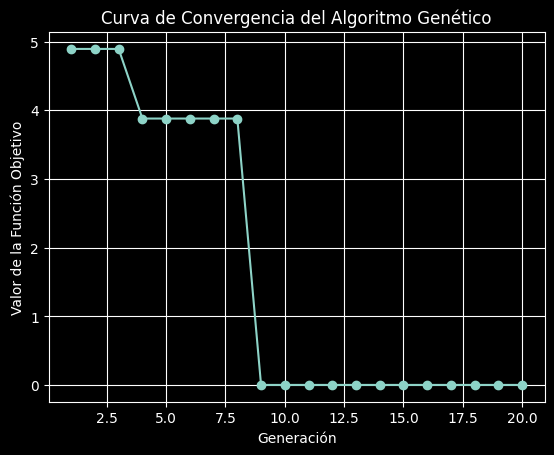

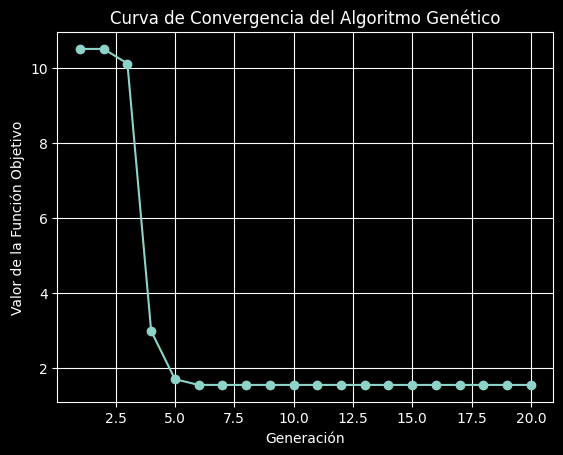

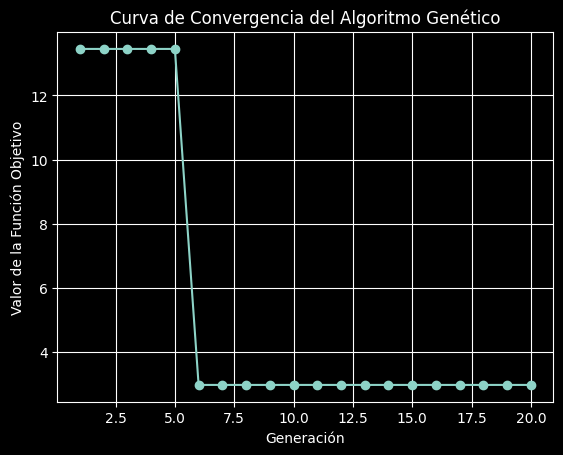

'1000011100'

In [99]:
plot = True

algoritmo_genetico_ran(4, LONGITUD_CROMOSOMA, 0.01, TASA_CRUCE, 20)
algoritmo_genetico_ran(4, LONGITUD_CROMOSOMA, 0.01, TASA_CRUCE, 20)
algoritmo_genetico_ran(4, LONGITUD_CROMOSOMA, 0.01, TASA_CRUCE, 20)


### Plots Ruleta

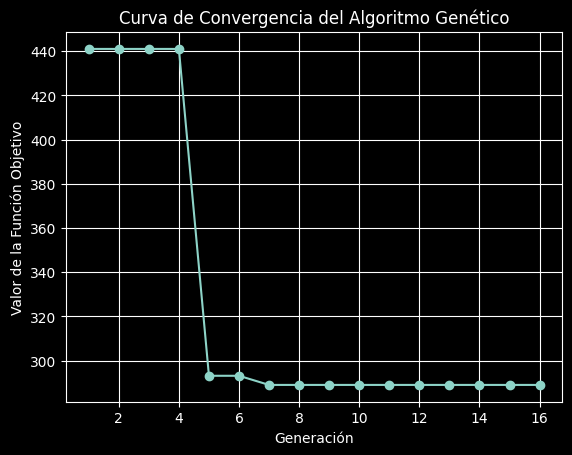

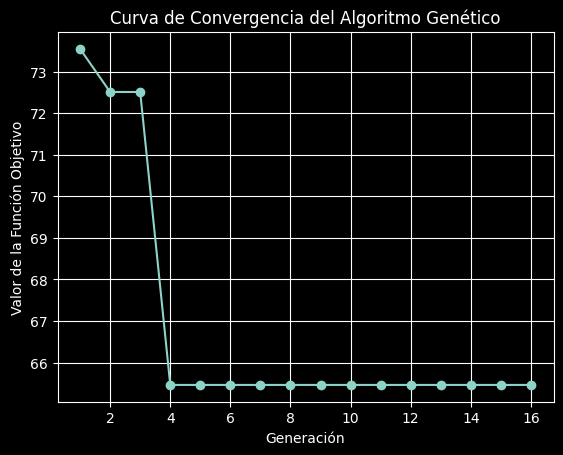

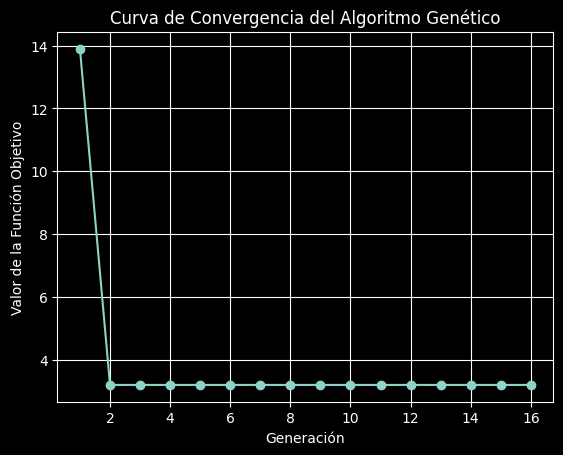

'1000011101'

In [100]:
algoritmo_genetico_rul(4, LONGITUD_CROMOSOMA, 0.01, TASA_CRUCE, 16)
algoritmo_genetico_rul(4, LONGITUD_CROMOSOMA, 0.01, TASA_CRUCE, 16)
algoritmo_genetico_rul(4, LONGITUD_CROMOSOMA, 0.01, TASA_CRUCE, 16)

### Plots Torneo

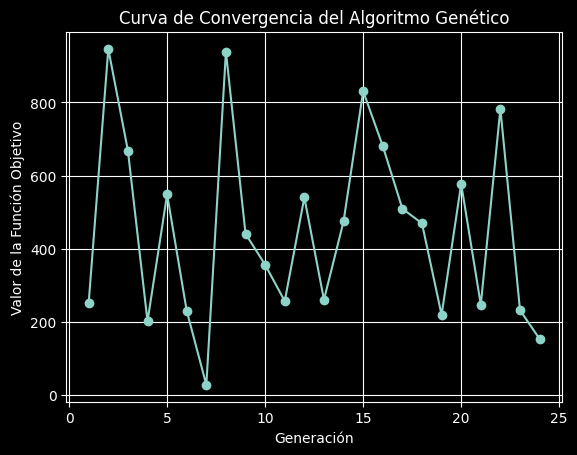

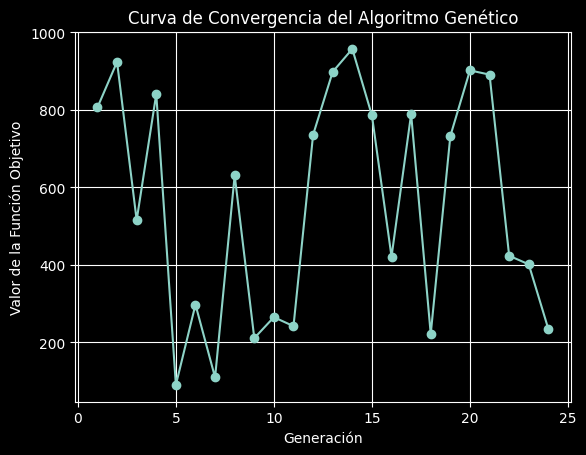

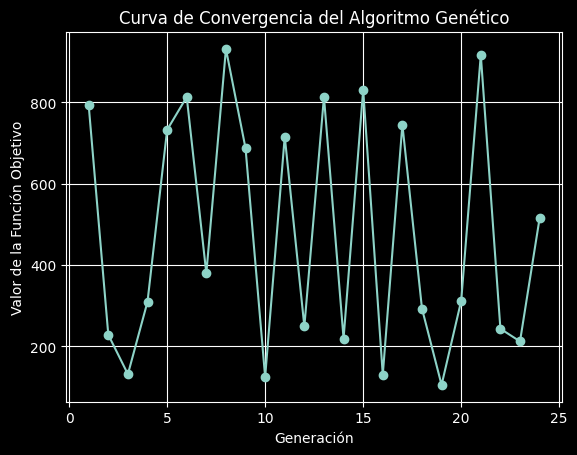

'0101111100'

In [22]:
algoritmo_genetico_tor(4, LONGITUD_CROMOSOMA, 0.2, TASA_CRUCE, 24)
algoritmo_genetico_tor(4, LONGITUD_CROMOSOMA, 0.2, TASA_CRUCE, 24)
algoritmo_genetico_tor(4, LONGITUD_CROMOSOMA, 0.2, TASA_CRUCE, 24)

f. Interpretar tanto las combinaciones de parámetros 
encontradas en cada uno de los 3 algoritmos como sus graficas de 
convergencia en el ítem anterior y explicarlas en el .pdf

Cada algoritmo (Ranking, Ruleta, y Torneo) ha arrojado una combinación diferente de hiperparámetros, que maximiza los valores de la función objetivo.<br><br>

Ranking:<br>

- Pm: 0.01, Población: 4, Generaciones: 20
- Resultados: Mínimo: -15.54, Promedio: -0.65, Máximo: 16.57, Desv. Est.: 5.30
- Interpretación: La tasa de mutación es baja (0.01), lo que indica un enfoque conservador, pero con una población pequeña (4), lo que sugiere que no se están probando muchas soluciones diferentes a la vez. El hecho de que en 20 generaciones se alcance un valor máximo de 16.57 es positivo, pero la desviación estándar también es considerable, indicando variabilidad en las soluciones encontradas.<br><br>
Ruleta:<br>

- Pm: 0.01, Población: 4, Generaciones: 16
- Resultados: Mínimo: -16.69, Promedio: -0.47, Máximo: 19.48, Desv. Est.: 5.66
- Interpretación: Nuevamente, tenemos una tasa de mutación baja con una pequeña población y 16 generaciones. La Ruleta parece haber encontrado una solución con un valor máximo ligeramente superior (19.48) comparado con Ranking, aunque el promedio es más bajo (-0.47). La desviación estándar es un poco más alta que en Ranking, lo que sugiere mayor variabilidad en los resultados obtenidos.<br><br>
Torneo:<br>

- Pm: 0.2, Población: 4, Generaciones: 24
- Resultados: Mínimo: -11.36, Promedio: 0.45, Máximo: 21.72, Desv. Est.: 6.78
- Interpretación: A diferencia de los otros dos algoritmos, Torneo ha utilizado una tasa de mutación mayor (0.2), lo que le ha permitido explorar más soluciones potencialmente distintas. El valor máximo de 21.72 es el más alto entre los algoritmos, y el promedio positivo de 0.45 indica que en general está encontrando mejores soluciones. Sin embargo, también tiene la mayor desviación estándar (6.78), lo que podría sugerir que aunque encuentra buenas soluciones, hay más variabilidad en los resultados.

Gráficas de Convergencia:<br><br>

Gráfico 1 (Ranking):<br>

La gráfica muestra una disminución rápida en las primeras 5 generaciones, seguida de una estabilización alrededor de un valor cercano a 0. Esto indica que el algoritmo converge rápidamente y, una vez alcanzado cierto punto, ya no sigue mejorando significativamente.<br>
Podemos concluir que la baja tasa de mutación y el número de generaciones probablemente no permiten explorar adecuadamente el espacio de soluciones después de la primera fase de convergencia.<br><br>
Gráfico 2 (Ruleta):<br>

Similar al gráfico anterior, se observa una caída rápida en las primeras generaciones, pero con un punto de estabilización más bajo, cercano a 300. Esto sugiere que el algoritmo también converge rápidamente, pero alcanza un punto de convergencia más bajo en comparación con Ranking.<br>
Podemos concluir la baja tasa de mutación junto con menos generaciones podría estar limitando la capacidad del algoritmo para continuar explorando mejores soluciones después de la convergencia inicial.<br><br>
Gráfico 3 (Torneo):<br>

Este gráfico es mucho más errático, con oscilaciones grandes durante todas las generaciones, sin una tendencia clara de convergencia. Esto indica que el algoritmo está explorando soluciones muy variadas y no logra estabilizarse en un valor consistente.<br>
Podemos concluir que la alta tasa de mutación está provocando una gran exploración del espacio de soluciones, lo que permite encontrar valores máximos altos, pero al mismo tiempo causa mucha variabilidad y falta de convergencia clara.

## Ejercicio 3

La distribución de la concentración de cierto contaminante en un canal está descrita por la ecuación:<br><br>
c(x,y) = 7.7 + 0.15x + 0.22y - 0.05x² - 0.016 y² - 0.007 xy<br><br>
En donde, las variables independientes se encuentran entre los límites de –10 ≤ x ≤ 10, 0 ≤ y ≤ 20.<br>
Para la función de adaptación anterior, escribir y ejecutar dos algoritmos genéticos que utilicen el operador de selección por ruleta y torneo respectivamente con probabilidades de cruza y mutación a elección. Luego 
realizar las siguientes consignas para ambos algoritmos:<br><br>
a. Determinar en forma aproximada la concentración máxima dada la función c(x, y). Utilizar una precisión de 3 decimales. Transcribir en el .pdf el resultado obtenido en ambos algoritmos.

In [23]:
import random
import matplotlib.pyplot as plt

# Parámetros del problema
X_MIN, X_MAX = -10, 10
Y_MIN, Y_MAX = 0, 20
LONGITUD_CROMOSOMA = 20  # Longitud de cromosomas para representar x e y
EPSILON = 1e-9
TAMANIO_TORNEO = 3

# Función para mapear el valor binario a un rango dado para x e y
def binario_a_decimal(cromosoma, minimo, maximo):
    decimal = int(cromosoma, 2)
    return minimo + decimal * (maximo - minimo) / ((2 ** LONGITUD_CROMOSOMA) - 1)

# Función objetivo
def funcion_objetivo(x, y):
    return 7.7 + 0.15 * x + 0.22 * y - 0.05 * x * x - 0.016 * y * y - 0.007 * x * y

# Función fitness
def aptitud(cromosoma_x, cromosoma_y):
    x = binario_a_decimal(cromosoma_x, X_MIN, X_MAX)
    y = binario_a_decimal(cromosoma_y, Y_MIN, Y_MAX)
    return funcion_objetivo(x, y)

# Inicialización de la población
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for _ in range(tamanio_poblacion):
        cromosoma_x = ''.join(str(random.randint(0, 1)) for _ in range(longitud_cromosoma))
        cromosoma_y = ''.join(str(random.randint(0, 1)) for _ in range(longitud_cromosoma))
        poblacion.append((cromosoma_x, cromosoma_y))
    return poblacion

# Selección por ruleta
def seleccion_ruleta(poblacion, aptitud_total):
    probabilidades = []
    for individuo in poblacion:
        prob = aptitud(individuo[0], individuo[1]) / aptitud_total
        probabilidades.append(prob)

    probabilidades_acumuladas = []
    suma = 0
    for prob in probabilidades:
        suma += prob
        probabilidades_acumuladas.append(suma)

    r = random.random()
    for i, acumulada in enumerate(probabilidades_acumuladas):
        if r <= acumulada:
            return poblacion[i]

# Cruce monopunto
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, LONGITUD_CROMOSOMA - 1)
        descendiente1_x = progenitor1[0][:punto_cruce] + progenitor2[0][punto_cruce:]
        descendiente2_x = progenitor2[0][:punto_cruce] + progenitor1[0][punto_cruce:]
        descendiente1_y = progenitor1[1][:punto_cruce] + progenitor2[1][punto_cruce:]
        descendiente2_y = progenitor2[1][:punto_cruce] + progenitor1[1][punto_cruce:]
    else:
        descendiente1_x, descendiente2_x = progenitor1[0], progenitor2[0]
        descendiente1_y, descendiente2_y = progenitor1[1], progenitor2[1]
    return (descendiente1_x, descendiente1_y), (descendiente2_x, descendiente2_y)

# Mutación
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ''.join(str(int(not int(bit))) if random.random() < tasa_mutacion else bit for bit in cromosoma)
    return cromosoma_mutado



In [24]:
# Algoritmo Genético con Ruleta
def algoritmo_genetico_rul(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)
    mejor_funcion_objetivo_generaciones = []

    for generacion in range(generaciones):
        aptitud_total = sum(aptitud(individuo[0], individuo[1]) for individuo in poblacion)

        progenitores = [seleccion_ruleta(poblacion, aptitud_total) for _ in range(tamanio_poblacion)]

        descendientes = []
        for i in range(0, tamanio_poblacion, 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        descendientes_mutados = [(mutacion(descendiente[0], tasa_mutacion), mutacion(descendiente[1], tasa_mutacion)) for descendiente in descendientes]

        poblacion.sort(key=lambda ind: aptitud(ind[0], ind[1]))
        descendientes_mutados.sort(key=lambda ind: aptitud(ind[0], ind[1]), reverse=True)
        for i in range(len(descendientes_mutados)):
            if aptitud(descendientes_mutados[i][0], descendientes_mutados[i][1]) > aptitud(poblacion[i][0], poblacion[i][1]):
                poblacion[i] = descendientes_mutados[i]

        mejor_individuo = max(poblacion, key=lambda ind: aptitud(ind[0], ind[1]))
        mejor_funcion_objetivo_generaciones.append(funcion_objetivo(binario_a_decimal(mejor_individuo[0], X_MIN, X_MAX),
                                                                    binario_a_decimal(mejor_individuo[1], Y_MIN, Y_MAX)))

    plt.plot(range(1, generaciones + 1), mejor_funcion_objetivo_generaciones, marker='o')
    plt.xlabel('Generación')
    plt.ylabel('Valor de la Función Objetivo')
    plt.title('Curva de Convergencia del Algoritmo Genético (Ruleta)')
    plt.grid(True)
    plt.show()

    return max(poblacion, key=lambda ind: aptitud(ind[0], ind[1]))

In [25]:
# Selección por torneo
def seleccion_torneo(poblacion, tamanio_torneo=TAMANIO_TORNEO):
    progenitores = []
    for _ in range(len(poblacion)):
        candidatos = random.sample(poblacion, tamanio_torneo)
        progenitor = max(candidatos, key=lambda ind: aptitud(ind[0], ind[1]))  # se selecciona el mejor individuo del torneo
        progenitores.append(progenitor)
    return progenitores

# Algoritmo Genético con Torneo
def algoritmo_genetico_tor(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)
    mejor_funcion_objetivo_generaciones = []

    for generacion in range(generaciones):
        progenitores = seleccion_torneo(poblacion)

        descendientes = []
        for i in range(0, len(progenitores), 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        descendientes_mutados = [(mutacion(descendiente[0], tasa_mutacion), mutacion(descendiente[1], tasa_mutacion)) for descendiente in descendientes]

        poblacion = descendientes_mutados

        mejor_individuo = max(poblacion, key=lambda ind: aptitud(ind[0], ind[1]))
        mejor_funcion_objetivo_generaciones.append(funcion_objetivo(binario_a_decimal(mejor_individuo[0], X_MIN, X_MAX),
                                                                    binario_a_decimal(mejor_individuo[1], Y_MIN, Y_MAX)))

    plt.plot(range(1, generaciones + 1), mejor_funcion_objetivo_generaciones, marker='o')
    plt.xlabel('Generación')
    plt.ylabel('Valor de la Función Objetivo')
    plt.title('Curva de Convergencia del Algoritmo Genético (Torneo)')
    plt.grid(True)
    plt.show()

    return max(poblacion, key=lambda ind: aptitud(ind[0], ind[1]))

d. Graficar las mejores aptitudes encontradas en 
función de cada generación (Curva de convergencia de ambos 
algoritmos). Cada gráfico debe contener título, leyenda y etiquetas en los 
ejes

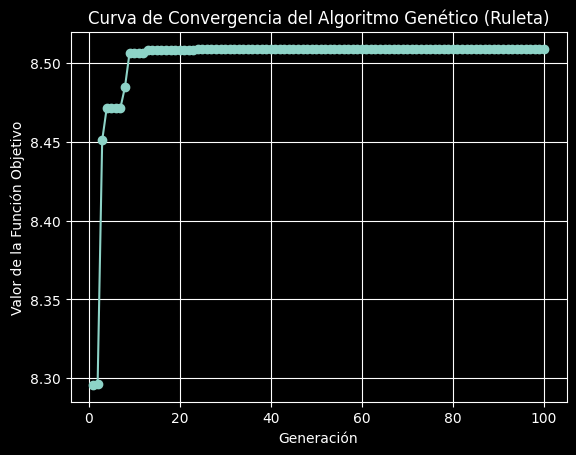

In [26]:
resultado_concentracion_ruleta = algoritmo_genetico_rul(tamanio_poblacion=50, longitud_cromosoma=LONGITUD_CROMOSOMA, tasa_mutacion=0.01, tasa_cruce=0.85, generaciones=100)

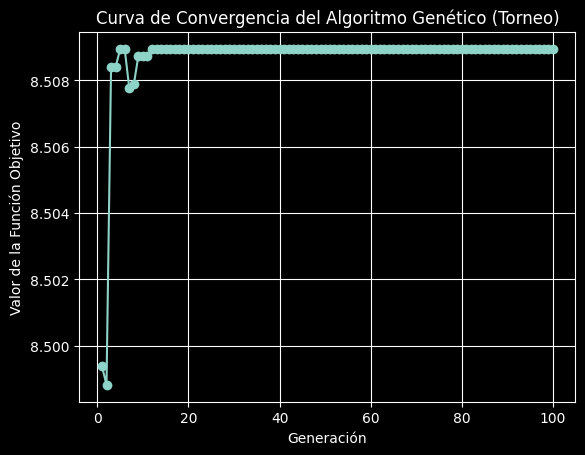

In [27]:
resultado_concentracion_torneo = algoritmo_genetico_tor(tamanio_poblacion=50, longitud_cromosoma=LONGITUD_CROMOSOMA, tasa_mutacion=0.01, tasa_cruce=0.85, generaciones=100)

In [31]:
print("Ruleta")
print(f"X: {binario_a_decimal(resultado_concentracion_ruleta[0], X_MIN, X_MAX)}, Y: {binario_a_decimal(resultado_concentracion_ruleta[1], Y_MIN, Y_MAX)}")
print("Torneo")
print(f"X: {binario_a_decimal(resultado_concentracion_torneo[0], X_MIN, X_MAX)}, Y: {binario_a_decimal(resultado_concentracion_torneo[1], Y_MIN, Y_MAX)}")

Ruleta
X: 1.0351667739551296, Y: 6.640612259495029
Torneo
X: 1.0351667739551296, Y: 6.650396967312782


c. Graficar c(x, y) en 3D para los intervalos de las 
variables independientes ya mencionados y agregar un punto rojo
(ruleta) y un punto azul (torneo) en la gráfica en donde el algoritmo haya 
encontrado el valor máximo. Cada gráfico debe contener título, leyenda 
y etiquetas en los ejes

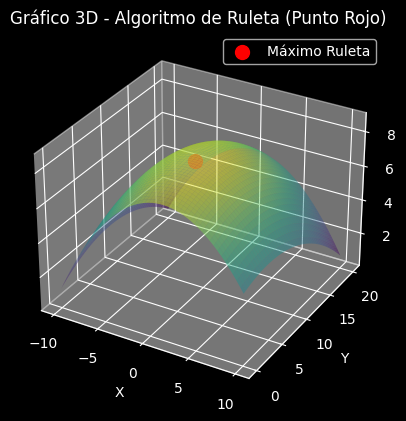

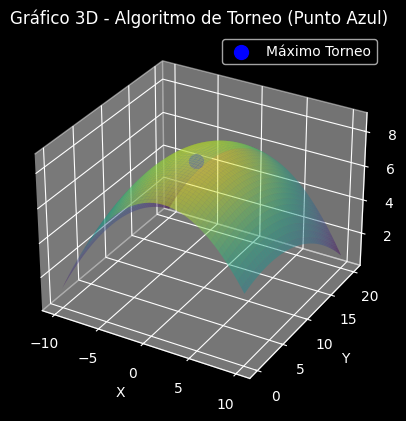

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función para calcular c(x, y)
def c(x, y):
    return 7.7 + 0.15 * x + 0.22 * y - 0.05 * x * x - 0.016 * y * y - 0.007 * x * y

# Definir los intervalos de x y y
x_vals = np.linspace(X_MIN, X_MAX, 400)
y_vals = np.linspace(Y_MIN, Y_MAX, 400)

# Crear una malla de coordenadas X, Y
X, Y = np.meshgrid(x_vals, y_vals)

# Calcular los valores de Z = c(x, y)
Z = c(X, Y)

# Obtener el mejor valor del algoritmo genético de ruleta
mejor_ruleta_x = binario_a_decimal(resultado_concentracion_ruleta[0], X_MIN, X_MAX)
mejor_ruleta_y = binario_a_decimal(resultado_concentracion_ruleta[1], Y_MIN, Y_MAX)
mejor_ruleta_z = c(mejor_ruleta_x, mejor_ruleta_y)

# Obtener el mejor valor del algoritmo genético de torneo
mejor_torneo_x = binario_a_decimal(resultado_concentracion_torneo[0], X_MIN, X_MAX)
mejor_torneo_y = binario_a_decimal(resultado_concentracion_torneo[1], Y_MIN, Y_MAX)
mejor_torneo_z = c(mejor_torneo_x, mejor_torneo_y)

# Crear figura para el gráfico de Ruleta (punto rojo)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie 3D
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# Agregar punto del valor máximo encontrado por ruleta
ax.scatter(mejor_ruleta_x, mejor_ruleta_y, mejor_ruleta_z, color='r', s=100, label="Máximo Ruleta")

# Configurar etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Concentración c(x, y)')

# Título y leyenda
ax.set_title('Gráfico 3D - Algoritmo de Ruleta (Punto Rojo)')
ax.legend()

# Mostrar el gráfico de Ruleta
plt.show()

# Crear figura para el gráfico de Torneo (punto azul)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie 3D
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# Agregar punto del valor máximo encontrado por torneo
ax.scatter(mejor_torneo_x, mejor_torneo_y, mejor_torneo_z, color='b', s=100, label="Máximo Torneo")

# Configurar etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Concentración c(x, y)')

# Título y leyenda
ax.set_title('Gráfico 3D - Algoritmo de Torneo (Punto Azul)')
ax.legend()

# Mostrar el gráfico de Torneo
plt.show()


e. Realizar conclusiones/comentarios/observaciones 
respecto a los resultados obtenidos en ambos algoritmos

### Conclusiones:

Ambos algoritmos, tanto el de selección por Ruleta como el de selección por Torneo, demostraron una rápida convergencia hacia el valor óptimo. En menos de 20 generaciones, ambos lograron encontrar soluciones que se acercan o alcanzan el óptimo del problema planteado.<br>
El algoritmo de selección por Ruleta mostró un comportamiento consistente y gradual. A lo largo de las generaciones, la aptitud del mejor individuo incrementó de manera continua, indicando que el algoritmo estaba explorando efectivamente el espacio de soluciones y refinando las mejores características de los cromosomas.<br>
En contraste, el algoritmo de selección por Torneo presentó un comportamiento más variable. Inicialmente, experimentó un aumento significativo en la aptitud, lo que sugiere que se estaban seleccionando individuos altamente aptos en las primeras generaciones.
Sin embargo, se observó una caída en la aptitud tras ese aumento, lo que podría indicar que algunos descendientes resultaron menos efectivos. A pesar de esto, el algoritmo se recuperó y volvió a aumentar su aptitud, alcanzando nuevamente el óptimo.